# Superstore EDA FINAL
Jamey Findling


# PRELIMINARIES

## Import Libraries, Read Data, Set Display
In this section we set up our Python environment by importing needed libraries, connecting to our drive and importing data (cleaning up the postal code column in the process), and adjusting display settings.

In [137]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Read data from Excel
path = '/content/drive/MyDrive/Data Science Student Work/2025SP_1 Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': str})
df['Postal Code'] = df['Postal Code'].str.zfill(5).fillna('na')
df.head()

# This "optimized" read fixes the postal code issue discussed below.
# I know this is supposed to be a "clean" version, but we are also supposed to provide explanations, so I kept the discussion in an "Appendix".

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [140]:
# Display missing columns
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [141]:
# Force Pandas NOT to use scientific notation and with 2 decimals and comma separator
pd.options.display.float_format = '{:,.2f}'.format

In [142]:
# Create a numeric data frame (not strictly necessary, but may be useful)
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
dfn = df[numeric_columns]
dfn.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,408.30,2,0.00,106.14,35.46
1,120.37,3,0.10,36.04,9.72
2,66.12,4,0.00,29.64,8.17
3,44.87,3,0.50,-26.06,4.82
4,113.67,5,0.10,37.77,4.70


## Basic EDA Investigations

In [143]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [144]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,na,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,na,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,na,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,na,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium


In [145]:
df.shape

(51290, 24)

In [146]:
df.sample(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
25518,18310,ES-2014-VG2179045-41823,2014-07-03,2014-07-08,Standard Class,VG-2179045,Vivek Gonzalez,Consumer,na,Toulouse,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,OFF-ST-4095,Office Supplies,Storage,"Eldon Shelving, Industrial",97.80,5,0.60,-139.50,5.62,High
33964,48245,MO-2015-AW93086-42012,2015-01-08,2015-01-13,Standard Class,AW-93086,Arthur Wiediger,Home Office,na,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6399,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",4.53,1,0.00,2.25,1.49,High
32918,20828,IN-2014-LS1697558-41989,2014-12-16,2014-12-20,Standard Class,LS-1697558,Lindsay Shagiari,Home Office,na,Ujjain,Madhya Pradesh,India,Southern Asia,Asia Pacific,FUR-BO-3634,Furniture,Bookcases,"Bush Floating Shelf Set, Metal",341.46,2,0.00,88.74,27.28,High
34296,45411,TU-2015-DK3150134-42024,2015-01-20,2015-01-26,Standard Class,DK-3150134,David Kendrick,Corporate,na,Osmaniye,Osmaniye,Turkey,Western Asia,Asia Pacific,OFF-AR-3456,Office Supplies,Art,"BIC Markers, Blue",10.57,1,0.60,-15.35,1.39,Medium
27115,13732,ES-2014-JD16150139-41868,2014-08-17,2014-08-20,Second Class,JD-16150139,Justin Deggeller,Corporate,na,Tamworth,England,United Kingdom,Northern Europe,Europe,OFF-EN-3658,Office Supplies,Envelopes,"Cameo Clasp Envelope, Security-Tint",23.82,2,0.00,5.70,3.55,Critical
51001,50334,AJ-2015-DR28809-42365,2015-12-27,2016-01-01,Standard Class,DR-28809,Dan Reichenbach,Corporate,na,Baku,Baki,Azerbaijan,Western Asia,Asia Pacific,FUR-FU-3933,Furniture,Furnishings,"Deflect-O Door Stop, Duo Pack",44.01,1,0.00,15.84,3.66,Medium
21659,11596,ES-2014-PN1877545-41713,2014-03-15,2014-03-19,Standard Class,PN-1877545,Parhena Norris,Home Office,na,Colomiers,Languedoc-Roussillon-Midi-Pyrénées,France,Western Europe,Europe,FUR-CH-4523,Furniture,Chairs,"Harbour Creations Chairmat, Black",563.52,9,0.10,68.61,50.74,Medium
12374,50870,NI-2013-LC687095-41432,2013-06-07,2013-06-12,Standard Class,LC-687095,Lena Cacioppo,Consumer,na,Lagos,Lagos,Nigeria,Western Africa,Africa,OFF-EN-3109,Office Supplies,Envelopes,"Ames Peel and Seal, Security-Tint",25.31,4,0.70,-33.01,1.90,Medium
50341,49780,SF-2015-FH4350117-42355,2015-12-17,2015-12-21,Standard Class,FH-4350117,Fred Harton,Consumer,na,Johannesburg,Gauteng,South Africa,Southern Africa,Africa,OFF-AR-3498,Office Supplies,Art,"Binney & Smith Pens, Water Color",30.24,2,0.00,10.86,1.68,Medium
23814,783,MX-2014-RB1964518-41789,2014-05-30,2014-06-04,Standard Class,RB-1964518,Robert Barroso,Corporate,na,Santarém,Pará,Brazil,South America,LATAM,OFF-FA-6199,Office Supplies,Fasteners,"Stockwell Rubber Bands, Bulk Pack",44.08,4,0.00,15.84,4.01,Medium


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [148]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00",51290,51290,"51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50",2014-05-11 21:26:49.155780864,2014-05-15 20:42:42.745174528,246.49,3.48,0.14,28.61,26.48
min,1.00,2012-01-01 00:00:00,2012-01-03 00:00:00,0.44,1.00,0.00,"-6,599.98",1.00
25%,"12,823.25",2013-06-19 00:00:00,2013-06-23 00:00:00,30.76,2.00,0.00,0.00,2.61
50%,"25,645.50",2014-07-08 00:00:00,2014-07-12 00:00:00,85.05,3.00,0.00,9.24,7.79
75%,"38,467.75",2015-05-22 00:00:00,2015-05-26 00:00:00,251.05,5.00,0.20,36.81,24.45
max,"51,290.00",2015-12-31 00:00:00,2016-01-07 00:00:00,"22,638.48",14.00,0.85,"8,399.98",933.57
std,"14,806.29",NaN,NaN,487.57,2.28,0.21,174.34,57.25


In [149]:
# getting info about .info()
df.info

<bound method DataFrame.info of        Row ID                  Order ID Order Date  Ship Date       Ship Mode  Customer ID     Customer Name      Segment Postal Code         City             State    Country           Region        Market   Product ID         Category Sub-Category                              Product Name  Sales  Quantity  Discount  Profit  Shipping Cost Order Priority
0       42433    AG-2012-TB112803-40909 2012-01-01 2012-01-06  Standard Class    TB-112803   Toby Braunhardt     Consumer          na  Constantine       Constantine    Algeria     North Africa        Africa  OFF-ST-6261  Office Supplies      Storage                       Tenex Lockers, Blue 408.30         2      0.00  106.14          35.46         Medium
1       22253    IN-2012-JH159857-40909 2012-01-01 2012-01-08  Standard Class    JH-159857       Joseph Holt     Consumer          na  Wagga Wagga   New South Wales  Australia          Oceania  Asia Pacific  OFF-SU-3002  Office Supplies     Supplies                  Acme Trimmer, High Speed 120.37         3      0.10   36.04           9.72         Medium
2       48883     HU-2012-AT73557-40909 2012-01-01 2012-01-05    Second Class     AT-73557     Annie Thurman     Consumer          na     Budapest          Budapest    Hungary   Eastern Europe        Europe  OFF-ST-6230  Office Supplies      Storage                   Tenex Box, Single Width  66.12         4      0.00   29.64           8.17           High
3       11731  IT-2012-EM14140124-40909 2012-01-01 2012-01-05    Second Class  EM-14140124      Eugene Moren  Home Office          na    Stockholm         Stockholm     Sweden  Northern Europe        Europe  OFF-PA-4177  Office Supplies        Paper               Enermax Note Cards, Premium  44.87         3      0.50  -26.06           4.82           High
4       22255    IN-2012-JH159857-40909 2012-01-01 2012-01-08  Standard Class    JH-159857       Joseph Holt     Consumer          na  Wagga Wagga   New South Wales  Australia          Oceania  Asia Pacific  FUR-FU-4075        Furniture  Furnishings                Eldon Light Bulb, Duo Pack 113.67         5      0.10   37.77           4.70         Medium
...       ...                       ...        ...        ...             ...          ...               ...          ...         ...          ...               ...        ...              ...           ...          ...              ...          ...                                       ...    ...       ...       ...     ...            ...            ...
51285   47594    MO-2015-LP709586-42369 2015-12-31 2016-01-05  Standard Class    LP-709586         Liz Preis     Consumer          na       Agadir  Souss-Massa-Draâ    Morocco     North Africa        Africa  OFF-BI-6397  Office Supplies      Binders   Wilson Jones Hole Reinforcements, Clear   3.99         1      0.00    0.42           1.49         Medium
51286   27700   IN-2015-KM1622527-42369 2015-12-31 2016-01-07  Standard Class   KM-1622527      Kalyca Meade    Corporate          na      Shantou         Guangdong      China     Eastern Asia  Asia Pacific  OFF-PA-4002  Office Supplies        Paper                Eaton Note Cards, 8.5 x 11  79.47         3      0.00   25.38           1.41         Medium
51287    8857   MX-2015-CM1219093-42369 2015-12-31 2016-01-02    Second Class   CM-1219093  Charlotte Melton     Consumer          na      Managua           Managua  Nicaragua  Central America         LATAM  OFF-LA-4637  Office Supplies       Labels    Hon Color Coded Labels, 5000 Label Set  26.40         3      0.00   12.36           1.35         Medium
51288    2143   MX-2015-JB1604582-42369 2015-12-31 2016-01-04  Standard Class   JB-1604582     Julia Barnett  Home Office          na      Reynosa        Tamaulipas     Mexico  Central America         LATAM  OFF-LA-5388  Office Supplies       Labels  Novimex Legal Exhibit Labels, Adjustable  16.74         3      0.00    0.66           1.32         Medium
51289    6852   MX-2015-TD2099582-42369 2

In [150]:
# getting info about .describe()
df.describe

<bound method NDFrame.describe of        Row ID                  Order ID Order Date  Ship Date       Ship Mode  Customer ID     Customer Name      Segment Postal Code         City             State    Country           Region        Market   Product ID         Category Sub-Category                              Product Name  Sales  Quantity  Discount  Profit  Shipping Cost Order Priority
0       42433    AG-2012-TB112803-40909 2012-01-01 2012-01-06  Standard Class    TB-112803   Toby Braunhardt     Consumer          na  Constantine       Constantine    Algeria     North Africa        Africa  OFF-ST-6261  Office Supplies      Storage                       Tenex Lockers, Blue 408.30         2      0.00  106.14          35.46         Medium
1       22253    IN-2012-JH159857-40909 2012-01-01 2012-01-08  Standard Class    JH-159857       Joseph Holt     Consumer          na  Wagga Wagga   New South Wales  Australia          Oceania  Asia Pacific  OFF-SU-3002  Office Supplies     Supplies                  Acme Trimmer, High Speed 120.37         3      0.10   36.04           9.72         Medium
2       48883     HU-2012-AT73557-40909 2012-01-01 2012-01-05    Second Class     AT-73557     Annie Thurman     Consumer          na     Budapest          Budapest    Hungary   Eastern Europe        Europe  OFF-ST-6230  Office Supplies      Storage                   Tenex Box, Single Width  66.12         4      0.00   29.64           8.17           High
3       11731  IT-2012-EM14140124-40909 2012-01-01 2012-01-05    Second Class  EM-14140124      Eugene Moren  Home Office          na    Stockholm         Stockholm     Sweden  Northern Europe        Europe  OFF-PA-4177  Office Supplies        Paper               Enermax Note Cards, Premium  44.87         3      0.50  -26.06           4.82           High
4       22255    IN-2012-JH159857-40909 2012-01-01 2012-01-08  Standard Class    JH-159857       Joseph Holt     Consumer          na  Wagga Wagga   New South Wales  Australia          Oceania  Asia Pacific  FUR-FU-4075        Furniture  Furnishings                Eldon Light Bulb, Duo Pack 113.67         5      0.10   37.77           4.70         Medium
...       ...                       ...        ...        ...             ...          ...               ...          ...         ...          ...               ...        ...              ...           ...          ...              ...          ...                                       ...    ...       ...       ...     ...            ...            ...
51285   47594    MO-2015-LP709586-42369 2015-12-31 2016-01-05  Standard Class    LP-709586         Liz Preis     Consumer          na       Agadir  Souss-Massa-Draâ    Morocco     North Africa        Africa  OFF-BI-6397  Office Supplies      Binders   Wilson Jones Hole Reinforcements, Clear   3.99         1      0.00    0.42           1.49         Medium
51286   27700   IN-2015-KM1622527-42369 2015-12-31 2016-01-07  Standard Class   KM-1622527      Kalyca Meade    Corporate          na      Shantou         Guangdong      China     Eastern Asia  Asia Pacific  OFF-PA-4002  Office Supplies        Paper                Eaton Note Cards, 8.5 x 11  79.47         3      0.00   25.38           1.41         Medium
51287    8857   MX-2015-CM1219093-42369 2015-12-31 2016-01-02    Second Class   CM-1219093  Charlotte Melton     Consumer          na      Managua           Managua  Nicaragua  Central America         LATAM  OFF-LA-4637  Office Supplies       Labels    Hon Color Coded Labels, 5000 Label Set  26.40         3      0.00   12.36           1.35         Medium
51288    2143   MX-2015-JB1604582-42369 2015-12-31 2016-01-04  Standard Class   JB-1604582     Julia Barnett  Home Office          na      Reynosa        Tamaulipas     Mexico  Central America         LATAM  OFF-LA-5388  Office Supplies       Labels  Novimex Legal Exhibit Labels, Adjustable  16.74         3      0.00    0.66           1.32         Medium
51289    6852   MX-2015-TD2099582-42369

## File Merge

In [151]:
df_people = pd.read_excel('/content/drive/MyDrive/Data Science Student Work/2025SP_1 Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name=1)
df_people.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


In [152]:
df_people.sample(20)

,Person,Region
8,Oxana Lagunov,Eastern Europe
14,Preecha Metharom,Southeastern Asia
11,Miina Nylund,Northern Europe
17,Gavino Bove,Southern Europe
10,Lindiwe Afolayan,North Africa
22,Gilbert Wolff,Western Europe
23,Derrick Snyders,Western US
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US
19,Katlego Akosua,Western Africa


In [153]:
df_people.index

RangeIndex(start=0, stop=24, step=1)

In [154]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  24 non-null     object
 1   Region  24 non-null     object
dtypes: object(2)
memory usage: 516.0+ bytes


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [156]:
df = df.merge(df_people, how='left', on='Region')

In [157]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [159]:
df.shape

(51290, 25)

In [160]:
df_people.shape

(24, 2)

In [161]:
df.sample(9)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
827,11106,ES-2012-LO1717048-40968,2012-02-29,2012-03-04,Standard Class,LO-1717048,Lori Olson,Corporate,na,Berlin,Berlin,Germany,Western Europe,Europe,TEC-AC-3387,Technology,Accessories,"Belkin Keyboard, USB",151.36,2,0.10,-5.06,14.22,Medium,Gilbert Wolff
48710,3855,MX-2015-CB1241598-42333,2015-11-25,2015-11-30,Standard Class,CB-1241598,Christy Brittain,Consumer,na,Panama City,Panama,Panama,Central America,LATAM,OFF-ST-6031,Office Supplies,Storage,"Smead File Cart, Blue",203.95,4,0.40,20.35,23.05,Medium,Nicodemo Bautista
29388,41428,TU-2014-ON8715134-41910,2014-09-28,2014-09-30,Second Class,ON-8715134,Odella Nelson,Corporate,na,Batman,Batman,Turkey,Western Asia,Asia Pacific,FUR-CH-5756,Furniture,Chairs,"SAFCO Chairmat, Adjustable",149.54,6,0.60,-142.24,2.04,Medium,Kaoru Xun
25321,22730,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,na,Sydney,New South Wales,Australia,Oceania,Asia Pacific,OFF-BI-6383,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",90.83,2,0.10,35.27,17.50,Critical,Kauri Anaru
26739,17048,IT-2014-JG1580548-41861,2014-08-10,2014-08-15,Second Class,JG-1580548,John Grady,Corporate,na,Nuremberg,Bavaria,Germany,Western Europe,Europe,OFF-EN-4451,Office Supplies,Envelopes,"GlobeWeis Peel and Seal, Recycled",40.38,2,0.00,19.38,5.00,Medium,Gilbert Wolff
41510,50113,SA-2015-BT1485110-42213,2015-07-28,2015-08-04,Standard Class,BT-1485110,Brad Thomas,Home Office,na,Riyadh,Ar Riyad,Saudi Arabia,Western Asia,Asia Pacific,TEC-CO-4776,Technology,Copiers,"HP Fax Machine, Laser","1,799.64",6,0.00,719.82,38.48,Medium,Kaoru Xun
17626,17226,ES-2013-GT1463548-41587,2013-11-09,2013-11-14,Standard Class,GT-1463548,Grant Thornton,Corporate,na,Dortmund,North Rhine-Westphalia,Germany,Western Europe,Europe,TEC-AC-5202,Technology,Accessories,"Memorex Keyboard, USB",143.10,2,0.00,5.70,11.32,Medium,Gilbert Wolff
45445,12866,ES-2015-Dp1324064-42279,2015-10-02,2015-10-06,Standard Class,Dp-1324064,Dean percer,Home Office,na,Rome,Lazio,Italy,Southern Europe,Europe,OFF-BI-6383,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",252.30,5,0.00,4.95,8.99,Medium,Gavino Bove
13807,38733,CA-2013-BP11095140-41481,2013-07-26,2013-07-31,Standard Class,BP-110951404,Bart Pistole,Corporate,93030,Oxnard,California,United States,Western US,USCA,OFF-AR-5313,Office Supplies,Art,Newell 334,99.20,5,0.00,25.79,4.90,Medium,Derrick Snyders


In [162]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,na,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,na,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,na,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,na,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,na,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium,Nicodemo Bautista


# CLEANING THE DATA
In this section we examine and fix the data as needed.

## 1st Phase - Setting Data Types
### Notes/Review
5 main datatypes:
*  bool
*  int64
*  float64
*  object
*  datetime64

#### pd.to_datetime()

#### pd.to_numeric()
*  often first need to remove symbols like dollar signs and commas
*  use str.replace()
*  EX: `clean_income = df.Income.str.replace('$',"").str.replace(',','')`

In [163]:
# exploring the df
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,na,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,na,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,na,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,na,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru


In [164]:
# checking the datatypes
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,object
City,object


In [165]:
# checking the datatypes another way
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     51290 non-null  object        
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Comment
I don't see many issues with the datatypes here. Numeric values are already either integers or floats. The IDs that you might think need to be changed, like Order ID or Product ID, have both letters and numbers and so can't be numeric. Postal Code issues addressed elsewhere.

## 2nd Phase - Additional Cleaning Steps
### Notes and Review: Data Issues Overview
*  Finding missing data
  *  `np.NaN` - is a Numpy datatype
  *  `pd.NA`
  *  `None`
  *  Can use `.info()` to get summary
  *  Can use `.isna()` to ID missing values
      *  Can add `.sum()` to see how many by column
      *  Can add `.any(axis=1)` to pull only rows with missing data
*  Handling missing data
  *  Requires thoughtful judgment
      *  Can keep it - use `.notna()`
      *  Can remove it - use `.dropna()`
          *  add `(how=all)` to remove rows that only have NaNs
          *  add `(thresh=2)` to set threshold for "n" values
          *  add `subset=['City']` to remove NaNs in specified columns
          *  NB: Need to save in new dataframe
      *  Can impute it (fill it in with constant or calculation) - use `fillna()` with `.zero, .mean, .mode, .median,` etc.
      *  Can resolve it - use domain knowledge to fill in gaps
*  Inconsistent text & typos

### Missing Data
Is there any missing data?

Looks pretty good overall -- here is my thinking:
*  .info() shows lots of missing postal codes, but that's to be expected since those are probably US only
*  only other column with missing values is Person, which were brought in when we merged - the merge was done on region - Region has no missing values but Person does - need to see why some of those are missing - looks like the spreadsheet has Eastern Canada and Western Canda in the People sheet, but only Canada in the Orders sheet
*  unfortunately I have no good way to tell if an order is from eastern or western Canada
*  we could strip "Eastern" and "Western" from the People sheet, but then the merge would not work
*  not sure what to do - perhaps best solution for now is to add both names
*  I used the built-in AI for help with this

In [166]:
# prompt: add "Lynne Marchand or Angela Jephson" to null cells in Person column

import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'Person' with the actual column name if it's different
df['Person'] = df['Person'].fillna('Lynne Marchand or Angela Jephson')


In [167]:
# prompt: show sample of rows where 'Region' is Canada

# Assuming your DataFrame is named 'df'
canada_rows = df[df['Region'] == 'Canada']
print(canada_rows.sample(5)) # Display 5 random rows where 'Region' is Canada


       Row ID                 Order ID Order Date  Ship Date       Ship Mode Customer ID         Customer Name      Segment Postal Code      City             State Country  Region Market   Product ID         Category Sub-Category                                Product Name  Sales  Quantity  Discount  Profit  Shipping Cost Order Priority                            Person
48100   50627    CA-2015-AB25523-42326 2015-11-18 2015-11-22  Standard Class    AB-25523  Alejandro Ballentine  Home Office          na    Whitby           Ontario  Canada  Canada   USCA  OFF-ST-4260  Office Supplies      Storage              Fellowes File Cart, Wire Frame 272.76         2      0.00   57.24          23.65         Medium  Lynne Marchand or Angela Jephson
14897   41635   CA-2013-CC222023-41515 2013-08-29 2013-09-02  Standard Class   CC-222023          Chris Cortes     Consumer          na     Laval            Quebec  Canada  Canada   USCA  OFF-ST-6228  Office Supplies      Storage                         

### Inconsistent Text & Typos: Making decimal places consistent
This was the only inconsistency I could find in the dataset.

In [168]:
# prompt: round floats in Sales and Profit and Shipping Cost to two decimal places

# Round 'Sales', 'Profit', and 'Shipping Cost' to two decimal places
df['Sales'] = df['Sales'].round(2)
df['Profit'] = df['Profit'].round(2)
df['Shipping Cost'] = df['Shipping Cost'].round(2)


## Conclusion
I did not find much to clean or fix in the Superstore dataset. I imagine that as a teaching tool, this data was pretty clean to start with. I did check several columns, standardized the decimal places, and did my best to fix an issue with the Persons associated with the Canada region.

## Appendix: The Problem of `Postal Code` Nulls and Data Type

### Explanation of Postal Code Issue
Note: The optimized fix for this issue is near the top of the notebook in the Preliminaries section, since it turns out the best approach is to set the Postal Code data type during the initial read-in of the data.

However, I have retained this explanatory section for the benefit of myself or any other readers who may come along.

**The Problem**

Due to Pandas reading the Postal Code column as a float, several issues came up, including:
*  Leading zeroes (common in the northeastern US) were dropped.
*  Decimals were added.
*  After adding a display adjustment elsewhere to display thousands separators, those showed up in postal codes as well.
*  Null values appeared as NaNs.


We needed to find a solution that:
*  Keeps null values (which are meaningful, indicating non-US locations).
*  Replaces 'NaN' with 'na' for better readability.
*  Keeps leading zeroes, but does not add them to 'na'.


To do this, we needed to specify appropriate data type for Postal Code column when first reading the Excel file.

In this case, we want Postal Codes to be read as strings (`str` data type).

We then need to fill in leading zeroes.

But we also need to remove them from NaNs.

The code below shows a step-by-step version of how to do that.

Since the optimized version is at the top of the notebook, the following steps are commented out but preserved here for explanatory value.

In [169]:
# Re-read original data into new DataFrame.
# Specify 'string' data type.  (NB: This is what we need instead of 'object'.)
# df1 = pd.read_excel('/content/drive/MyDrive/Data Science Student Work/2025SP_1 Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx', dtype={'Postal Code': str})
# columns = ['Country', 'State', 'City', 'Postal Code']

# mask = df1['Postal Code'].notnull()
# df1[columns].loc[mask].sort_values('Postal Code').head(20)

# Below we see the leading zeroes are present in 'df1'

In [170]:
# # Ensure all values contain at least 5 characters and fill with leading zeroes.
# df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)

# # view results
# columns = ['Country', 'State', 'City', 'Postal Code']
# mask = df1['State'] == 'Massachusetts'
# df1[columns].loc[mask].sort_values('Postal Code').head(20)

In [171]:
# # sample all postal codes
# df1['Postal Code'].sample(20)

# # Oh no! using zfill() added unwanted '00's to nans
# # We can see this if we work our way down through the cells one at a time.
# # The following cell provides the fix.

In [172]:
# # replace '00nan' with 'na'
# df1['Postal Code'].replace('00nan', 'na', inplace=True)
# df1['Postal Code'].sample(20)

# VISUALIZING THE DATA

In this section we display the following types of visualizations:
*  Histograms
*  Boxplots
*  Categorical Fields
*  Categorical + Numeric Fields
*  Time Series

Additional notes:
*  Use plots and statistics to ID outliers. (NB: These techniques can highlight “red flags,” but we still need to evaluate case by case.)
*  Visualizations can also be created directly from a Pandas DataFrame
  *  Use `.plot()` method
  *  EX: `tea_temps.plot.barh();` for horizontal bar chart
  *  EX: `us_happiness.plot.line(x='year', y='happiness score')'` for line chart with labels

# Histograms
*  **Histograms** visualize distribute or “shape” of column.
*  In Python, can use Matplotlib (common) or Seaborn (looks nicer, has some add’l features).
*  Changing # of bins allows for more granular or bucketed viz.

## Looping to Generate Multiple Histograms

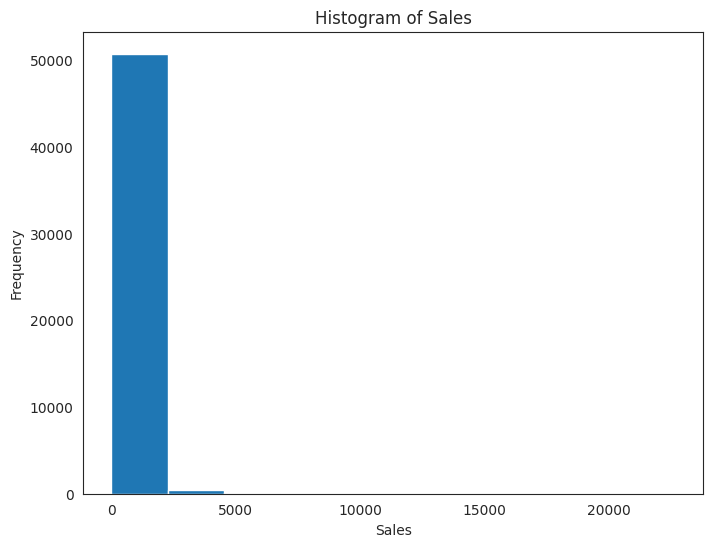

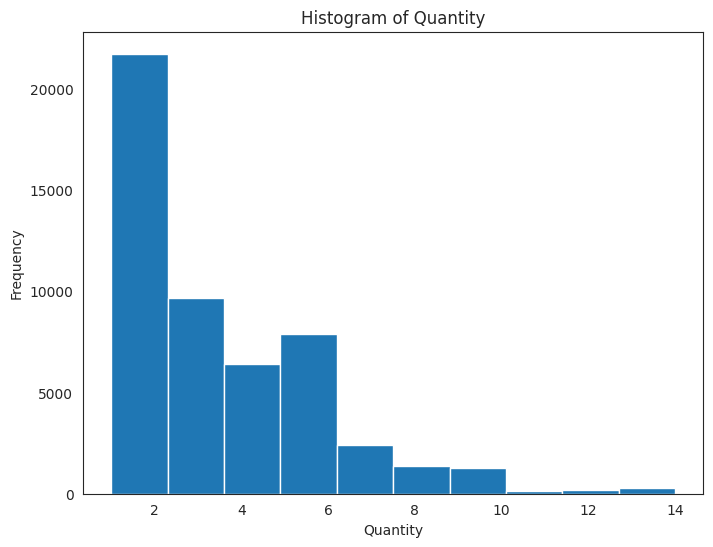

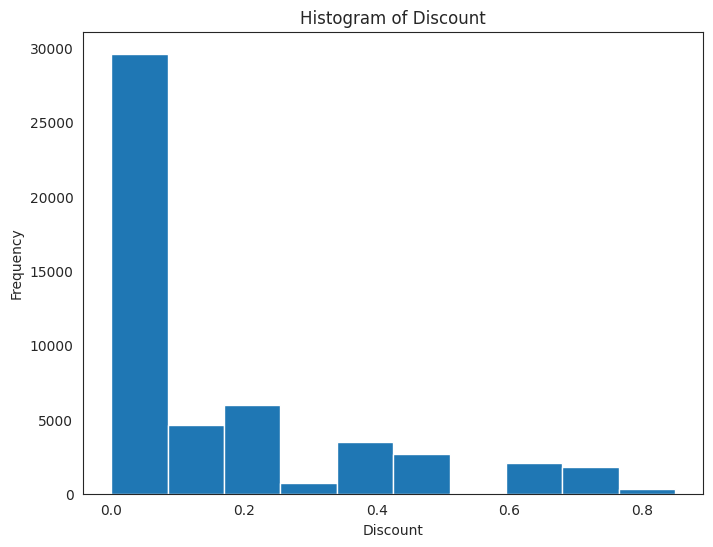

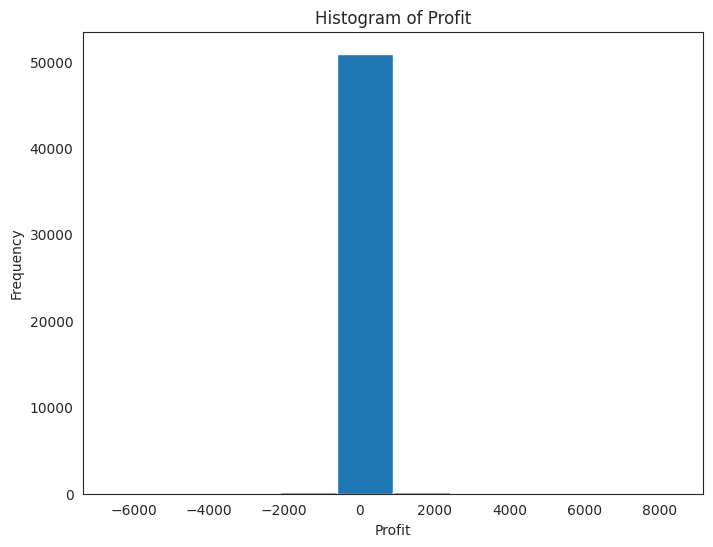

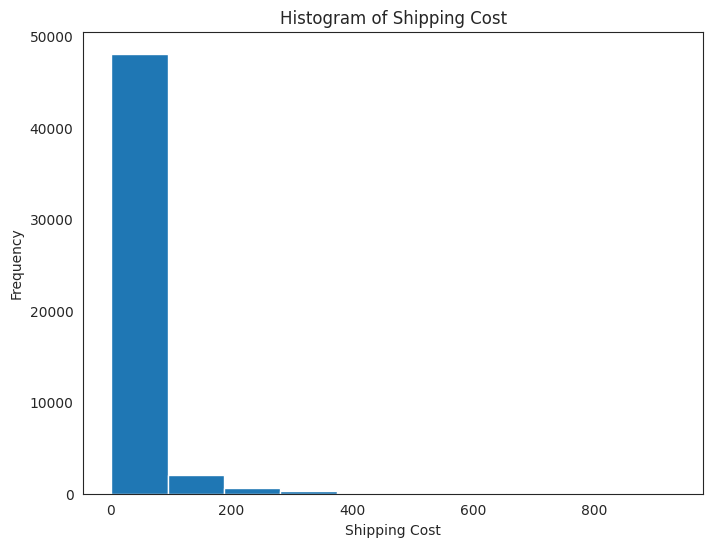

In [173]:
# Prompted Gemini: create a histogram for each column in dfn
for column in dfn.columns:   # Gemini gives me a loop to do all columns with one command
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.hist(dfn[column], bins=10)  # Adjust the number of bins as desired
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {column}")
  plt.show()

## Sales Histogram

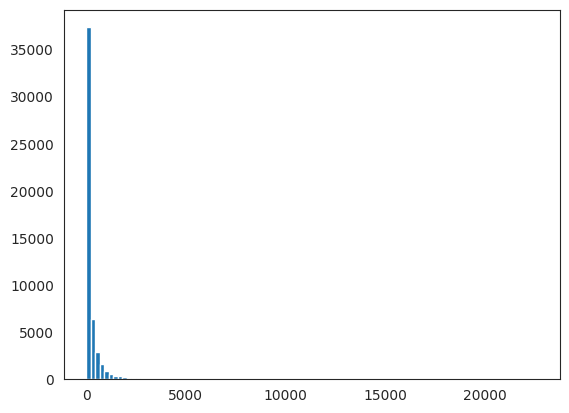

In [174]:
# Sales histogram (with increased # of bins)
plt.hist(dfn.Sales, bins=100); # call hist from plt

### Interpretation of Sales Histogram
The above chart shows the amount of each sales transaction. The vast majority are at the bottom of the scale, indicating smaller orders. I started with the default of 10 bins and then went up to 100, but adjusting the number of bins is not very helpful because the x-axis goes so far to the right. This is due to high-value outliers, as seen in next cell.

In [175]:
dfn.describe()   # This shows the max value in Sales is 22,638.48, which is what forces the x-axis to be so extended.

,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,246.49,3.48,0.14,28.61,26.48
std,487.57,2.28,0.21,174.34,57.25
min,0.44,1.00,0.00,"-6,599.98",1.00
25%,30.76,2.00,0.00,0.00,2.61
50%,85.05,3.00,0.00,9.24,7.79
75%,251.05,5.00,0.20,36.81,24.45
max,"22,638.48",14.00,0.85,"8,399.98",933.57


## Quantity Histogram

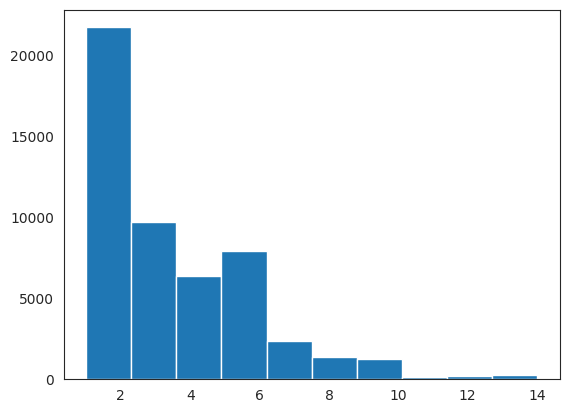

In [176]:
# histogram for Quantity
plt.hist(dfn.Quantity, bins=10);

### Interpretation of Quantity Histogram
The above chart shows the quantity of items in each order. Need to adjust the number of bins (below). Doing so allows us to see clearly that the most common number of items ordered is 2, then 3, then 1. It's interesting that most orders include multiple items.

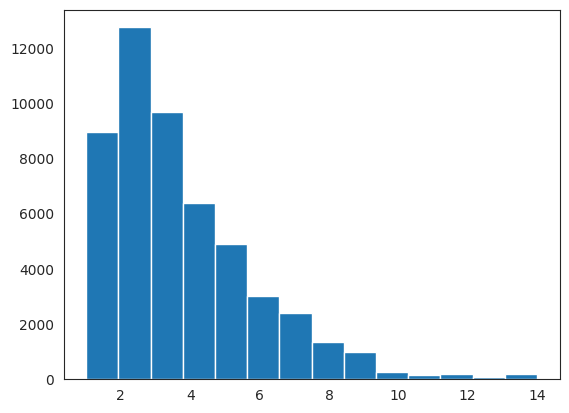

In [177]:
# adjusted histogram for Quantity
plt.hist(dfn.Quantity, bins=14);

## Discount Histogram

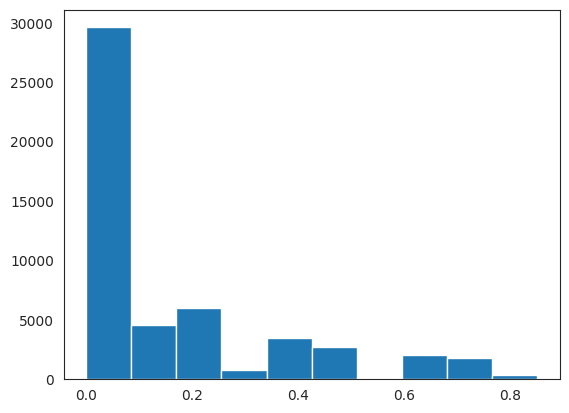

In [178]:
# histogram for Discount
plt.hist(dfn.Discount, bins=10);

### Interpretation of Discount Histogram
This is pretty useful as is (with 10 bins). We can see that by far the most common discount is from 0 (no discount) to .08 or so. However, a more granular viz (below) shows that most orders are not discounted at all, which we can also see in the `describe()` function above. Of those that are, .20 (or 20%) seems to be the most common.

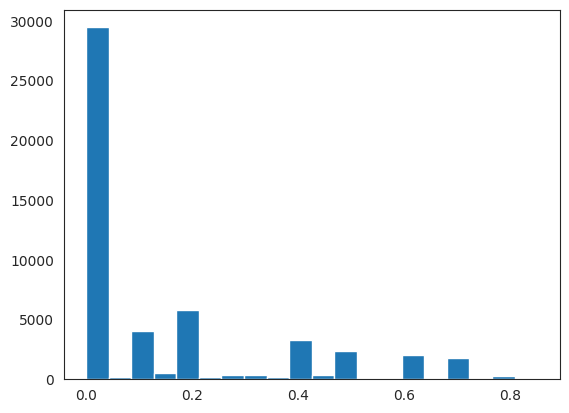

In [179]:
# histogram for Discount with more bins
plt.hist(dfn.Discount, bins=20);

## Profit Histogram

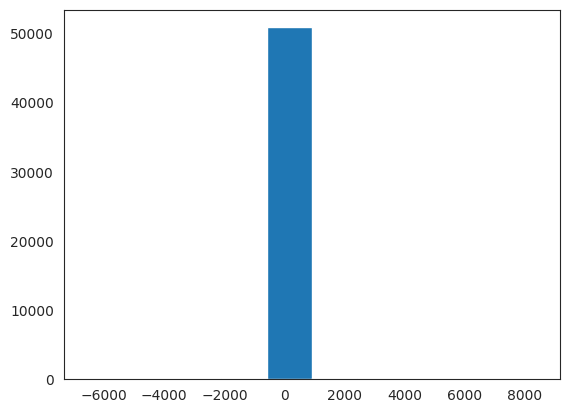

In [180]:
# histogram for Profit
plt.hist(dfn.Profit, bins=10);

### Interpretation of Profit Histogram
The above chart shows the profit (positive or negative) for each order. It's kind of funny, because there are major outliers in both directions that are not even visible on the chart. With only 10 bins, this forces everything else into a single bar in the middle -- essentially useless information. I suspect more bins won't help much, if at all. (See below for 100.) This may not be the best way to explore this column.

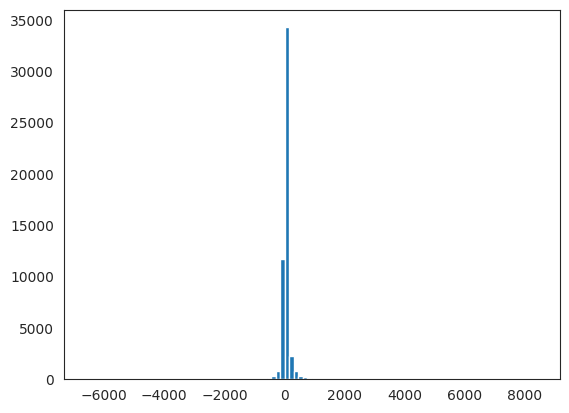

In [181]:
# histogram for Profit with more bins
plt.hist(dfn.Profit, bins=100);

## Shipping Cost Histogram

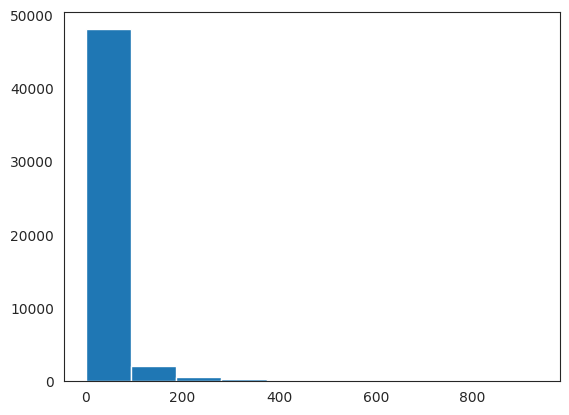

In [182]:
# histogram for Shipping Cost
plt.hist(dfn['Shipping Cost'], bins=10);

### Interpretation of Shipping Cost Histogram
Another case where the outlier renders the chart fairly useless. Most shipping costs are on the low end of the x-axis. Increasing the number of bins makes this a bit clearer, but doesn't add much insight.

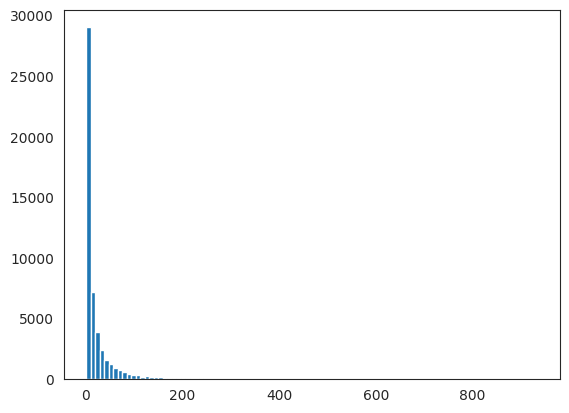

In [183]:
# histogram for Shipping Cost with more bins
plt.hist(dfn['Shipping Cost'], bins=100);

# Box Plots
*  **Boxplots** visualize descriptive statistics of numerical columns.
*  Based on quartiles
  *  Middle 50% = box
  *  Lines (min/max) = 1.5x interquartile range
  *  Anything outside min/max = outlier (shown as dots)
*  Standard deviation shows spread of data set
  *  Outliers are usu. >= 3 SD from mean in normal distribution (depending on data)

## Sales Boxplot

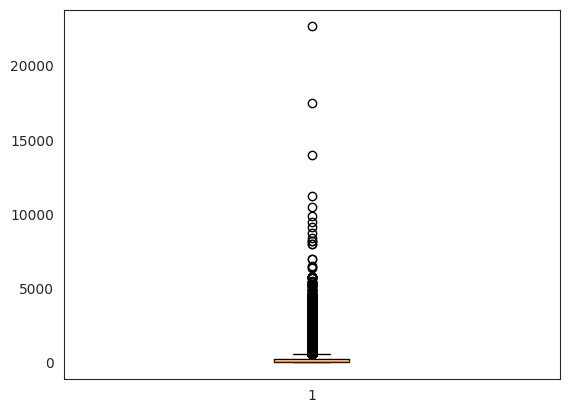

In [184]:
# prompt: what is the least amount of code to get a box plot for sales

plt.boxplot(df['Sales']);


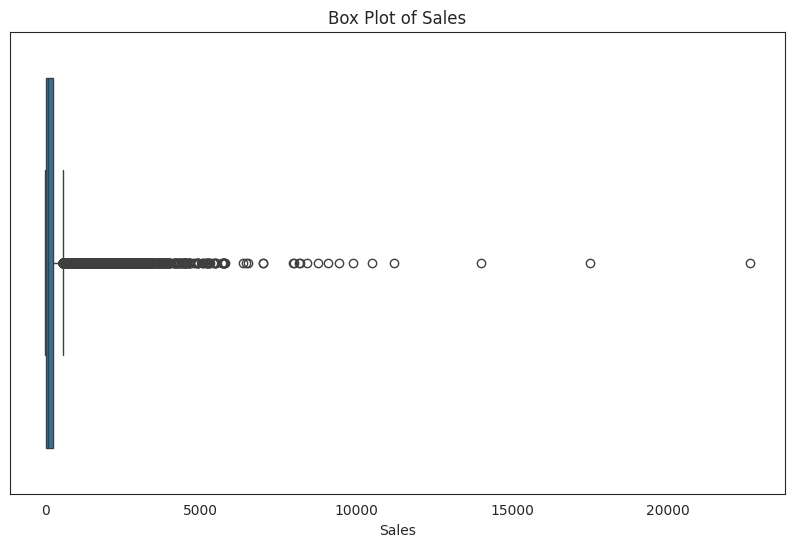

In [185]:
# prompt: make a nicer boxplot for sales with seaborn

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()


### Interpretation of Sales Boxplot
I used Gemini to get two different boxplots: one simple and one with some added aesthetics, using Seaborn. Both resemble a line with dots/circles coming out one side. This is similar to the situation with the charts -- the vast majority of the data is clustered in one area: in this case, the low end of the scale.

## Quantity Boxplot

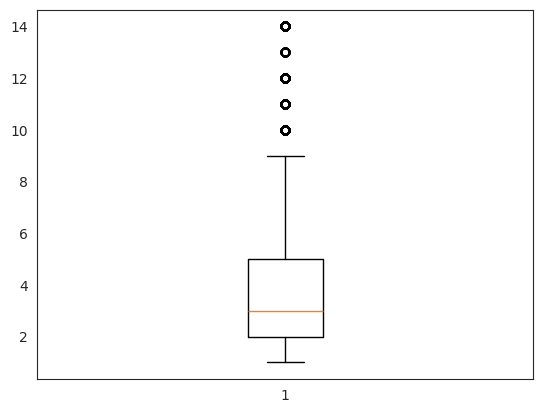

In [186]:
# simple boxplot for Quantity
plt.boxplot(df.Quantity);

### Interpretation of Quantity Boxplot
This shows that the most common number of items in an order is between 2 and 5. The outliers are at 10 and above.

## Discount Boxplot

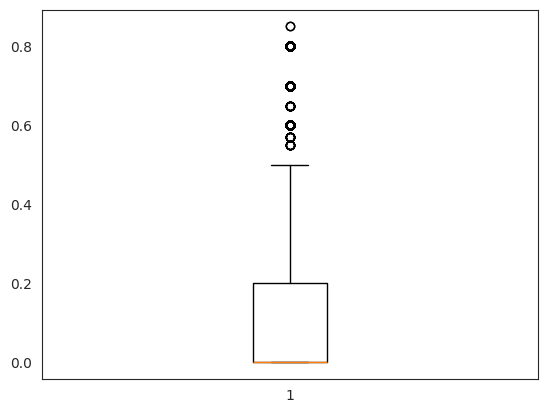

In [187]:
# simple boxplot for Discount
plt.boxplot(df.Discount);

### Interpretation of Discount Boxplot
Most discounts are between 0 and 20%. The outliers are at 50% and above, going as high as 80-85%.

## Profit Boxplot

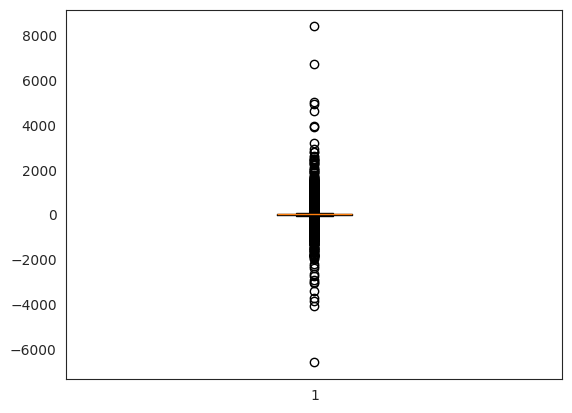

In [188]:
# simple boxplot for Profit
plt.boxplot(df.Profit);

### Interpretation of Profit Boxplot
As with the chart, we see a great clustering in the center, with essentially a line rather than a box. However, the boxplot is somewhat more informative since the outliers are visible. We can see that there is one outlier on the negative side, where the profit was over -$6000 -- probably something we need to look into. And there are a few on the positive side as well.

## Shipping Cost Boxplot

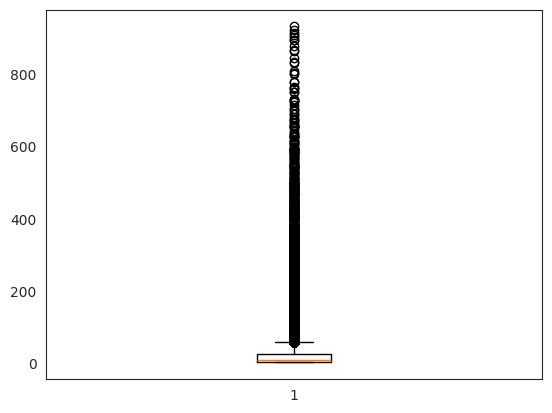

In [189]:
# simple boxplot for Shipping Cost
plt.boxplot(df['Shipping Cost']);


### Interpretation of Shipping Costs Boxplot
Here we can see that Shipping Costs are almost all on the low end, but that there are quite a few orders where the costs have ranged higher, up to nearly 900. Hopefully that was for the order where the profit was over 6000!

# Categorical Fields: Bar Charts
*  Ship Mode
*  Segment
*  Region
*  Market
*  Category
*  Sub-Category
*  Order Priority

## Ship Mode

In [190]:
# Looking at the data
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


In [191]:
# Defining the "data" variable
data = df['Ship Mode'].value_counts()
data

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


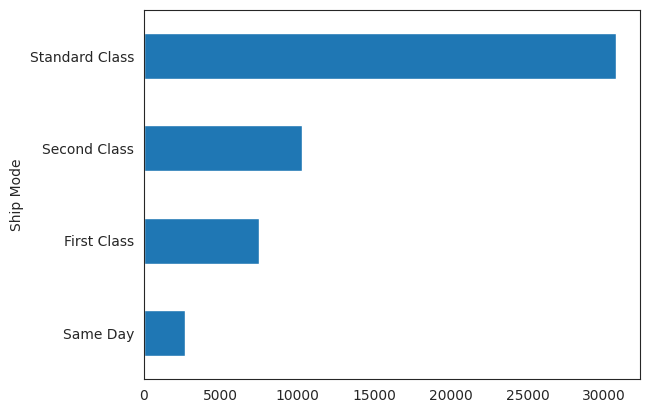

In [192]:
# reordering the vertical bar chart (quirk is it seems to reverse -- perhaps it is "stacking" from bottom up)
data = df['Ship Mode'].value_counts(ascending=True)
data.plot.barh();

In [193]:
# getting proportional data with normalize argument
data = df['Ship Mode'].value_counts(normalize=True)
data

,proportion
Ship Mode,
Standard Class,0.60
Second Class,0.20
First Class,0.15
Same Day,0.05


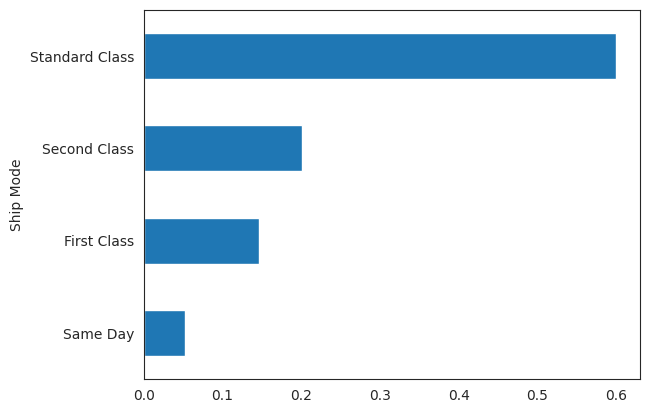

In [194]:
# combining arguments: proportional + hbar
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data.plot.barh();

### Interpretation
The above bar charts show that the majority of orders are shipped standard class, with a fair proportion also going second or first class. A small minority of orders are same day. In general, horizontal bar charts are easier to read; it's a bit odd that's not the default.

## Segment

In [195]:
# segment counts
data = df['Segment'].value_counts()
data

,count
Segment,
Consumer,26518
Corporate,15429
Home Office,9343


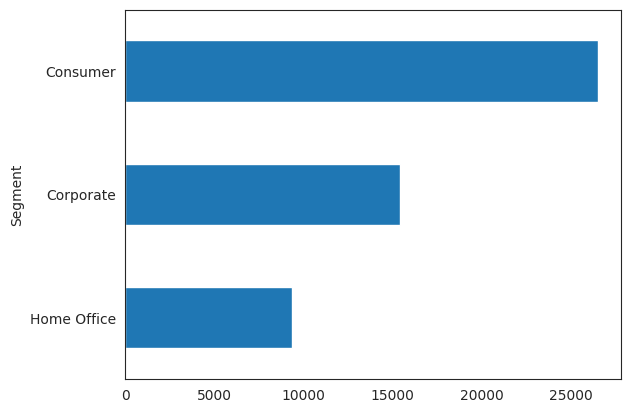

In [196]:
# segment horizontal bar chart -- sorted greatest to least
data = df['Segment'].value_counts(ascending=True)
data.plot.barh();

### Interpretation
This shows that the greatest number of orders are for consumers, followed by corporate, followed by home office.

## Region

In [197]:
# region counts
data = df['Region'].value_counts()
data

,count
Region,
Western Europe,5883
Central America,5616
Oceania,3487
Western US,3203
Southeastern Asia,3129
South America,2988
Eastern US,2848
Southern Asia,2655
Western Asia,2440


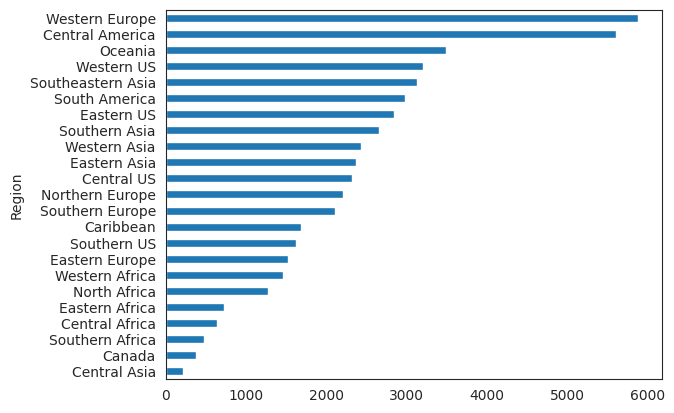

In [198]:
# region h-bar chart
data = df['Region'].value_counts(ascending= True)
data.plot.barh();

### Interpretation
Here we see the global distribution of orders. Positioning horizontally makes a big difference with this many categories; it is quite difficult to read the labels sideways. After reordering from greatest to least, it's easy to see that Western Europe and Central America are highest performing regions by a significant margin, while the African regions, along with Canada and Central Asia, trail at the bottom.

## Market

In [199]:
# market values
data = df['Market'].value_counts()
data

,count
Market,
Asia Pacific,14302
Europe,11729
USCA,10378
LATAM,10294
Africa,4587


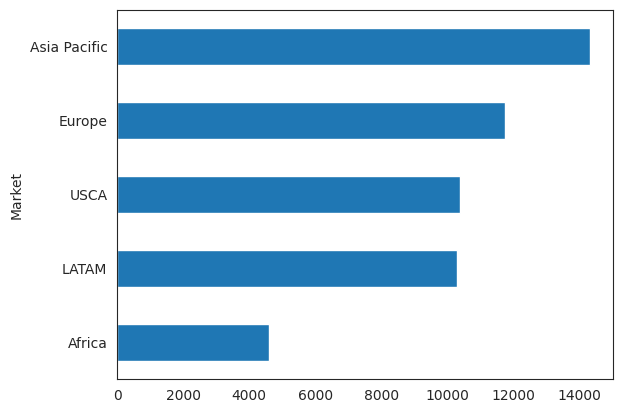

In [200]:
# market h-bar chart
data = df['Market'].value_counts(ascending=True)
data.plot.barh();

### Interpretation
In the above we see the market share of major global regions, with Asia Pacific on top, then a drop to Europe, then a small drop to the US and Canada alongside Latin America. Africa, not surprisingly, holds the smallest market share.

## Category

In [201]:
# category values
data = df['Category'].value_counts()
data

,count
Category,
Office Supplies,31289
Technology,10141
Furniture,9860


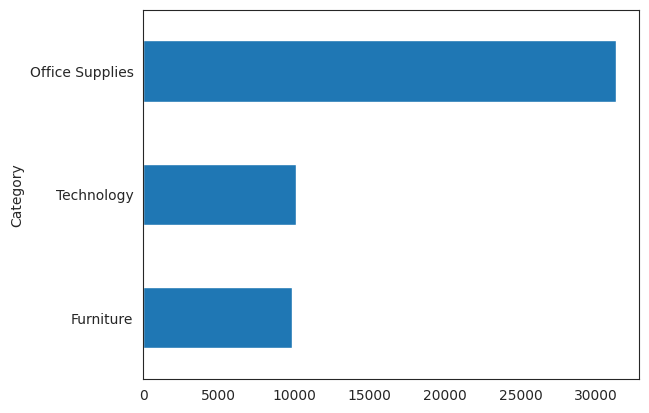

In [202]:
# category h-bar chart
data = df['Category'].value_counts(ascending=True)
data.plot.barh();

### Interpretation
Here we see a simple chart showing the three major categories of product sold by the Superstore. With so few categories, the vertical alignment is arguably just as useful as the horizontal one, since it is not so hard to read and the vertical bars may show more clearly the difference in height. I would also say at this point that while I appreciate Python's ability to provide visualizations, I miss PowerBI's sophistication.

## Sub-Category

In [203]:
# subcategory values
data = df['Sub-Category'].value_counts()
data

,count
Sub-Category,
Binders,6146
Storage,5049
Art,4864
Paper,3492
Chairs,3434
Phones,3357
Furnishings,3154
Accessories,3075
Labels,2601


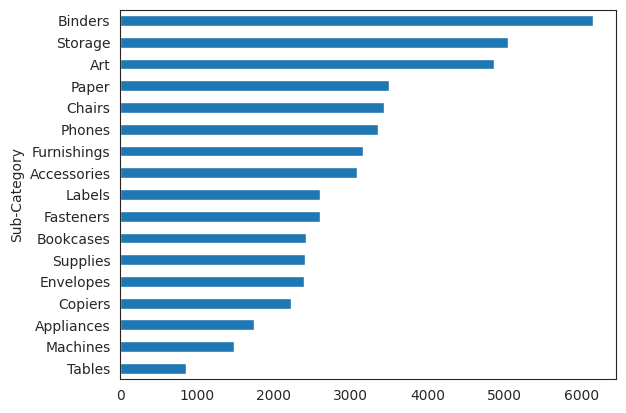

In [204]:
# subcategory h-bar chart
data = df['Sub-Category'].value_counts(ascending=True)
data.plot.barh();

### Interpretation
Here we are back to a more complex set of data, so the horizontal layout is much preferable. The sub-categories of binders, storage, and art are our leaders. Tables are our lowest sub-category.

## Order Priority

In [205]:
# order priority values
data = df['Order Priority'].value_counts()
data

,count
Order Priority,
Medium,29433
High,15501
Critical,3932
Low,2424


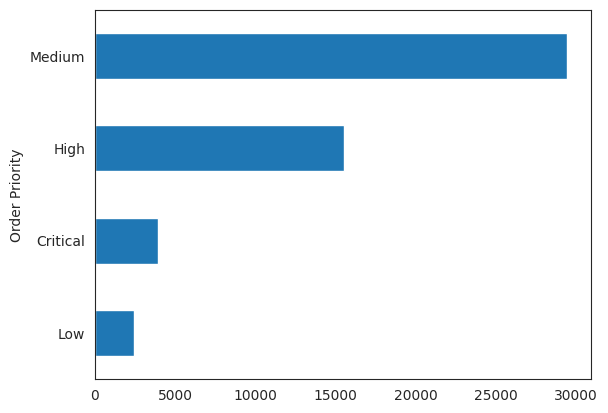

In [206]:
# order priority h-bar charts
data = df['Order Priority'].value_counts(ascending=True)
data.plot.barh();

### Interpretation
Again, with so few categories, the alignment is less important, and the charts provide less value-added in comparison to simply scanning the data. The clear insight is that medium priority orders dominate, followed by high. Critical and, perhaps surprisingly, low priority orders trail behind.

# Categorical + Numeric Fields


## Total Sales by Segment

In [207]:
# segment
df['Segment'].value_counts()    # not a float, so doesn't display with commas or decimals

,count
Segment,
Consumer,26518
Corporate,15429
Home Office,9343


In [208]:
# total sales by segment
df.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,"6,507,949.43"
Corporate,"3,824,697.55"
Home Office,"2,309,855.07"


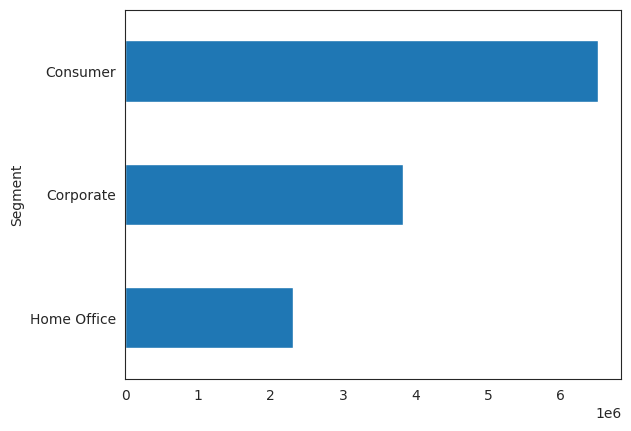

In [209]:
# sales by segment horizontal bar chart
data = df.groupby('Segment')['Sales'].sum().sort_values()
data.plot.barh();

## Total Sales by Category

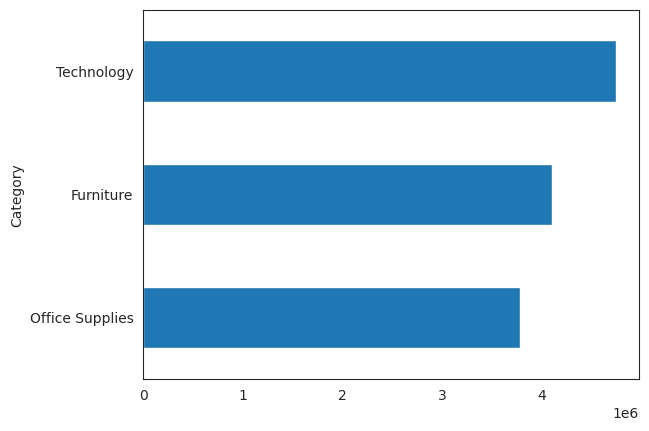

In [210]:
# sales by category horizontal bar chart
data = df.groupby('Category')['Sales'].sum().sort_values()
data.plot.barh();

## Total Sales by Sub-Category

Sub-Category
Phones        1,706,824.19
Copiers       1,509,436.31
Chairs        1,501,681.85
Bookcases     1,466,572.11
Storage       1,126,812.98
Appliances    1,010,535.57
Machines        779,060.14
Tables          757,041.89
Accessories     749,237.02
Binders         461,869.58
Furnishings     385,155.96
Art             371,613.25
Supplies        242,811.03
Paper           241,787.52
Envelopes       169,217.35
Fasteners        89,494.98
Labels           73,350.32
Name: Sales, dtype: float64


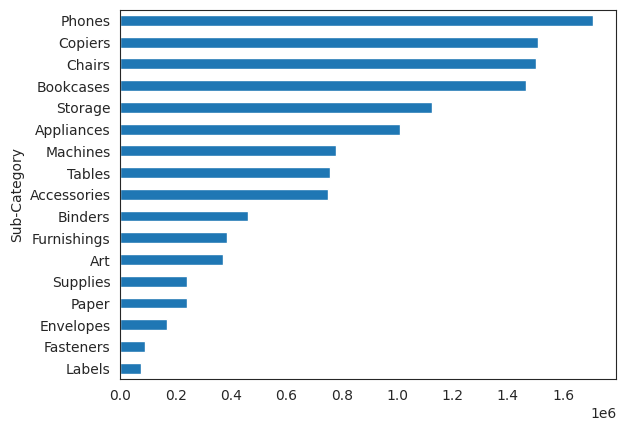

In [211]:
# sales by sub-category horizontal bar chart
raw_data = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(raw_data)

data = df.groupby('Sub-Category')['Sales'].sum().sort_values()
data.plot.barh();

### Comment
For more complex data like this, it can be helpful to display the raw numbers together with the chart. The visualization helps with broad comprehension, while the numbers allow for greater precision.

## Total Sales by Region

Region
Western Europe      1,731,929.70
Central America     1,223,100.79
Oceania             1,100,184.44
Southeastern Asia     884,423.35
Southern Asia         866,572.71
Eastern Asia          855,059.37
Western US            725,457.80
Eastern US            678,781.31
Northern Europe       636,779.16
South America         617,223.64
Southern Europe       608,593.98
Central US            501,239.76
Southern US           391,721.87
Caribbean             324,280.88
Western Asia          317,106.94
Eastern Europe        310,033.44
North Africa          233,216.61
Western Africa        173,878.83
Central Africa        143,630.01
Eastern Africa        127,856.05
Southern Africa       105,191.76
Canada                 66,928.17
Central Asia           19,311.48
Name: Sales, dtype: float64


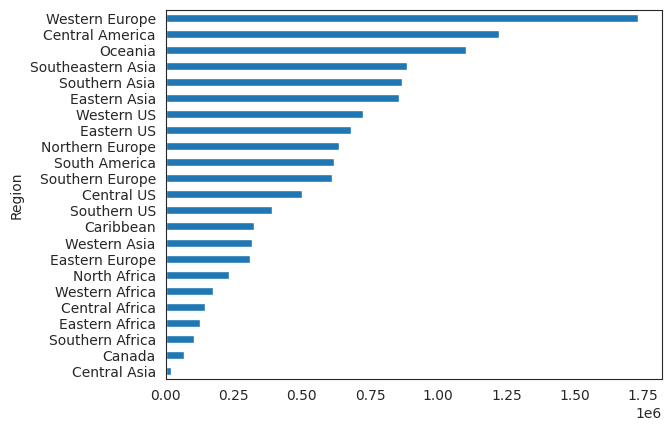

In [212]:
# sales by region horizontal bar chart
raw_data = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(raw_data)

data = df.groupby('Region')['Sales'].sum().sort_values()
data.plot.barh();

## Total Sales by Market

Market
Asia Pacific   4,042,658.29
Europe         3,287,336.28
USCA           2,364,128.91
LATAM          2,164,605.31
Africa           783,773.26
Name: Sales, dtype: float64


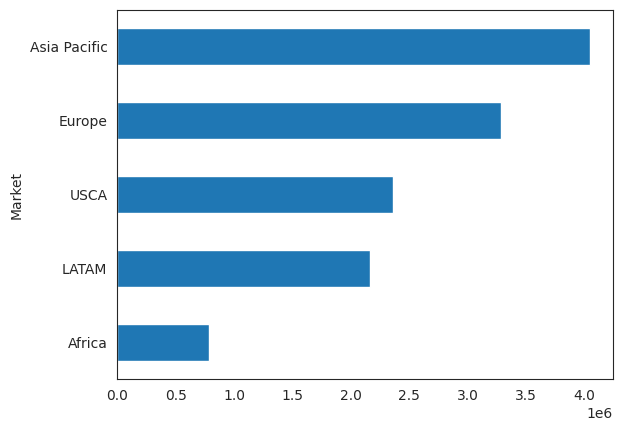

In [213]:
# sales by market data and horizontal bar chart
raw_data = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(raw_data)

data = df.groupby('Market')['Sales'].sum().sort_values()
data.plot.barh();

# Time Series Analyses


## Sales by Month and Quarter - groupby method
*  I used ChatGPT to generate code and walk me through
*  I commented out a few unnecessary steps at the start
*  In general, with this approach it seems that we are first formatting the 'Order Date' column, then going through that column and pulling out (or grouping) all the rows that have the same year and month (or year and quarter), and finally summing up all the 'Sales' values in each group
*  These summed totals ('monthly_sales' and 'quarterly_sales') are then used to populate the charts
*  ChatGPT initially opted for bar charts, but it was easy to revise this to generate line graphs

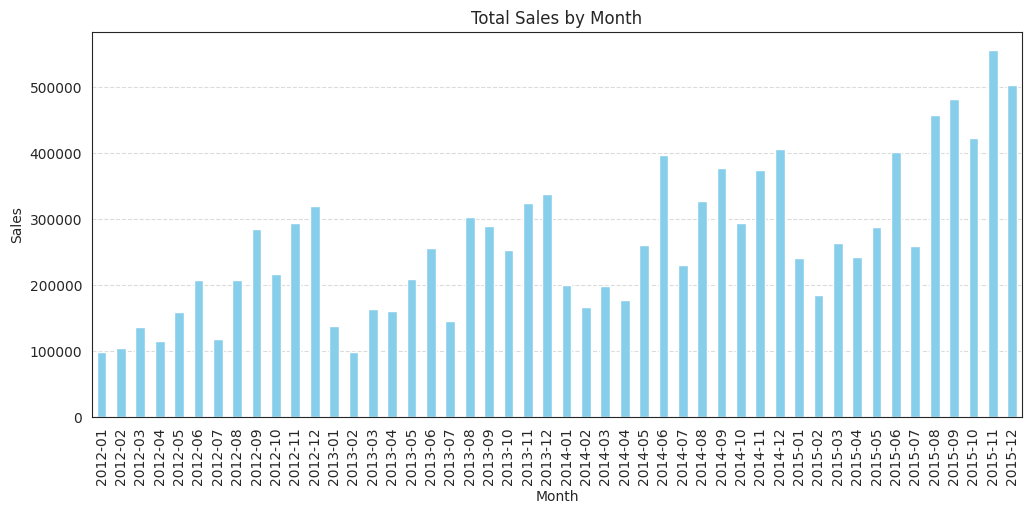

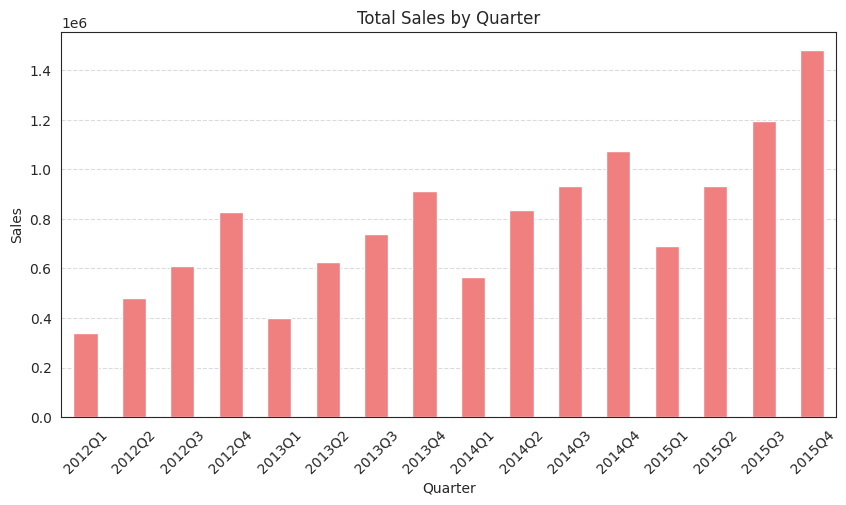

In [214]:
# import pandas as pd    [already done up top]
# import matplotlib.pyplot as plt    [already done up top]

# Load the Excel file    [already done]
# file_path = '/mnt/data/Global_Superstore_Orders_2012_2015.xlsx'
# df = pd.read_excel(file_path)

# Ensure the 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['Order Date'])

# Extract month and quarter
df['Year-Month'] = df['Order Date'].dt.to_period('M')
df['Year-Quarter'] = df['Order Date'].dt.to_period('Q')

# Group by month and quarter
monthly_sales = df.groupby('Year-Month')['Sales'].sum()
quarterly_sales = df.groupby('Year-Quarter')['Sales'].sum()

# Plot Monthly Sales
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Quarterly Sales
plt.figure(figsize=(10, 5))
quarterly_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



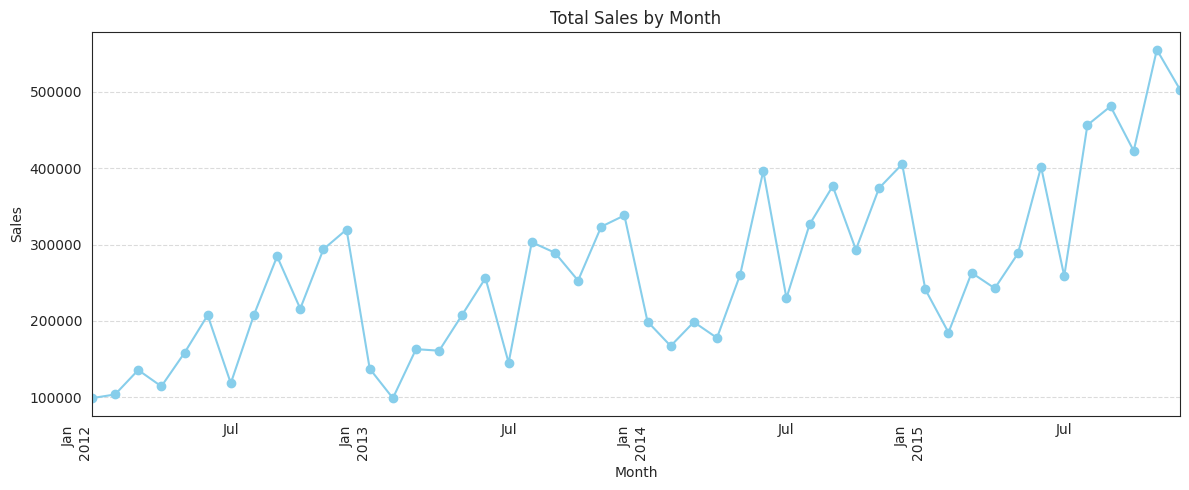

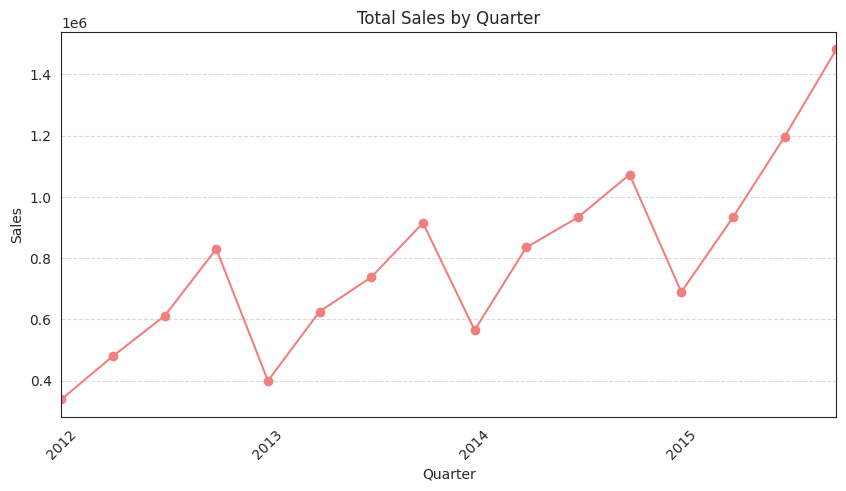

In [215]:
# Line graphs instead of bar charts

# Plot Monthly Sales
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='skyblue', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Quarterly Sales
plt.figure(figsize=(10, 5))
quarterly_sales.plot(kind='line', marker='o', color='lightcoral', linestyle='-')
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Sales by Month and Quarter - resample method
*  Ran into an error here where 'resample' was being called directly on 'Sales': `df.resample['Sales']`
*  But 'Sales' is not the right data type for resample because it is not a time series
*  This recurred below on 'Profit' as well
*  Gemini was able to spot this and enabled me to fix it
*  There was also an issue involving a future change to Pandas, which necessitates changing 'M' to 'ME' (for 'Month End') and 'Q' to 'QE' throughout

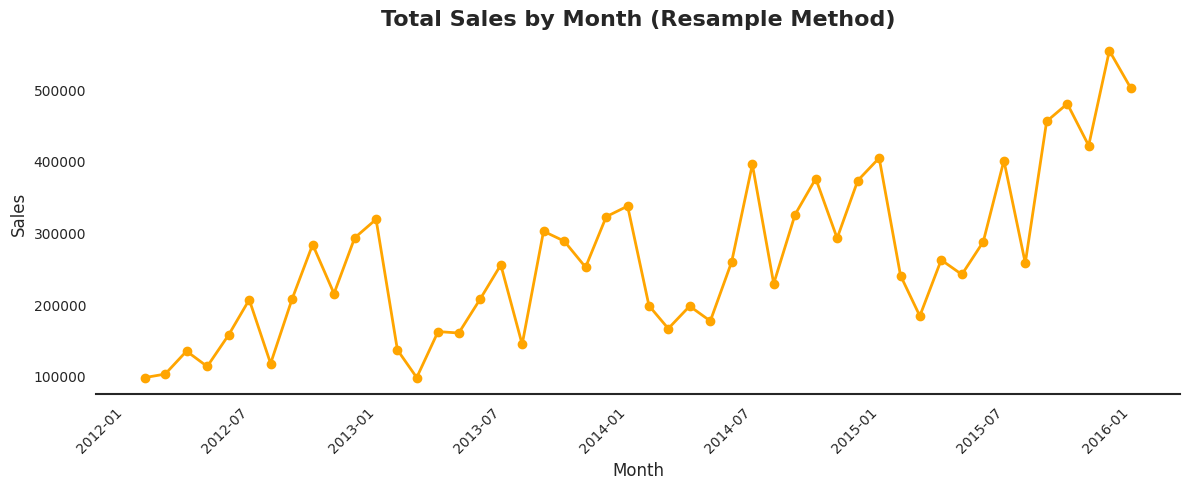

In [216]:
# Resample sales data by month using 'ME' instead of 'M'
monthly_sales_resampled = df.resample('ME', on='Order Date')['Sales'].sum()

# Generate the line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales_resampled.index, monthly_sales_resampled.values, marker='o', linestyle='-', linewidth=2, color='orange')
plt.title('Total Sales by Month (Resample Method)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)

# Clean up the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show();


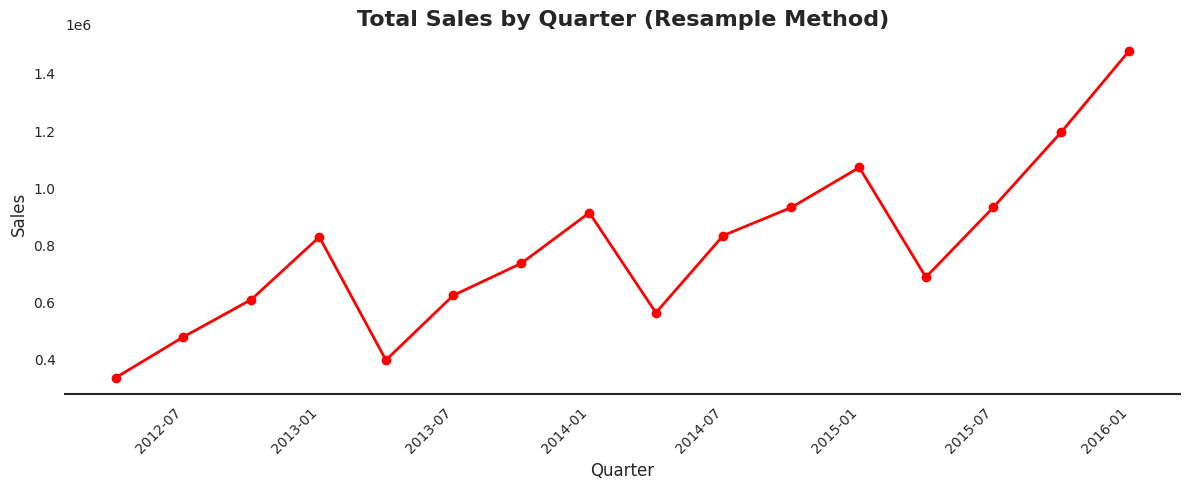

In [217]:
# Resample sales data by quarter using 'Q' for quarterly frequency
quarterly_sales_resampled = df.resample('QE', on='Order Date')['Sales'].sum()

# Generate the line plot for Total Sales by Quarter using Resample Method
plt.figure(figsize=(12, 5))
plt.plot(quarterly_sales_resampled.index, quarterly_sales_resampled.values, marker='o', linestyle='-', linewidth=2, color='red')
plt.title('Total Sales by Quarter (Resample Method)', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)

# Clean up the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show();


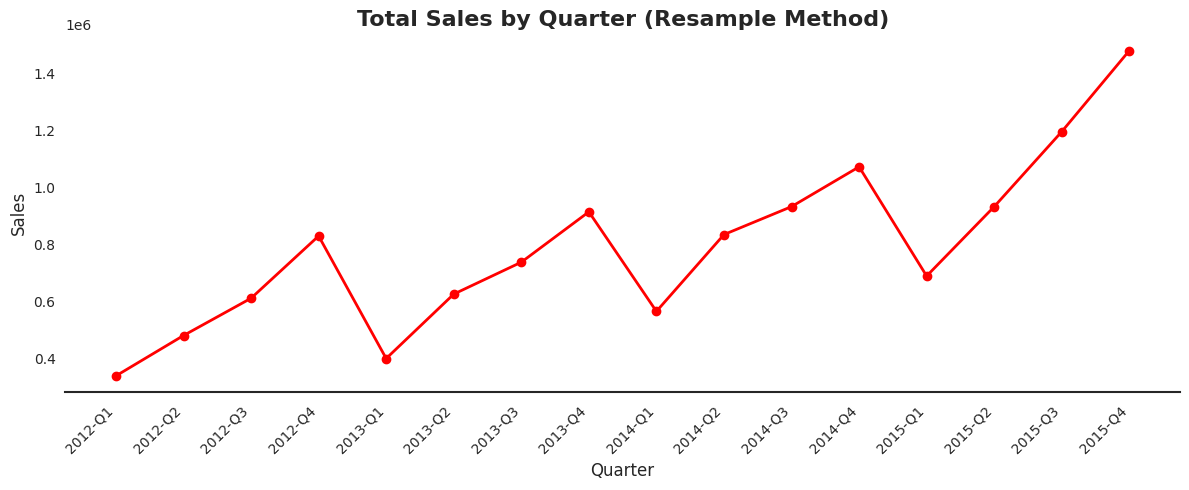

In [218]:
# fixing x-axis labels

import matplotlib.pyplot as plt

# Resample sales data by quarter
quarterly_sales_resampled = df.resample('QE', on='Order Date')['Sales'].sum()

# Convert index to a "YYYY-QX" format for readability
quarter_labels = [f"{x.year}-Q{x.quarter}" for x in quarterly_sales_resampled.index]

# Generate the line plot for Total Sales by Quarter using Resample Method
plt.figure(figsize=(12, 5))
plt.plot(quarter_labels, quarterly_sales_resampled.values, marker='o', linestyle='-', linewidth=2, color='red')
plt.title('Total Sales by Quarter (Resample Method)', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)

# Clean up the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show();


## Profit by Month and Quarter - resample method
*  Here all that was needed was switch from summing up the 'Sales' column to 'Profit'

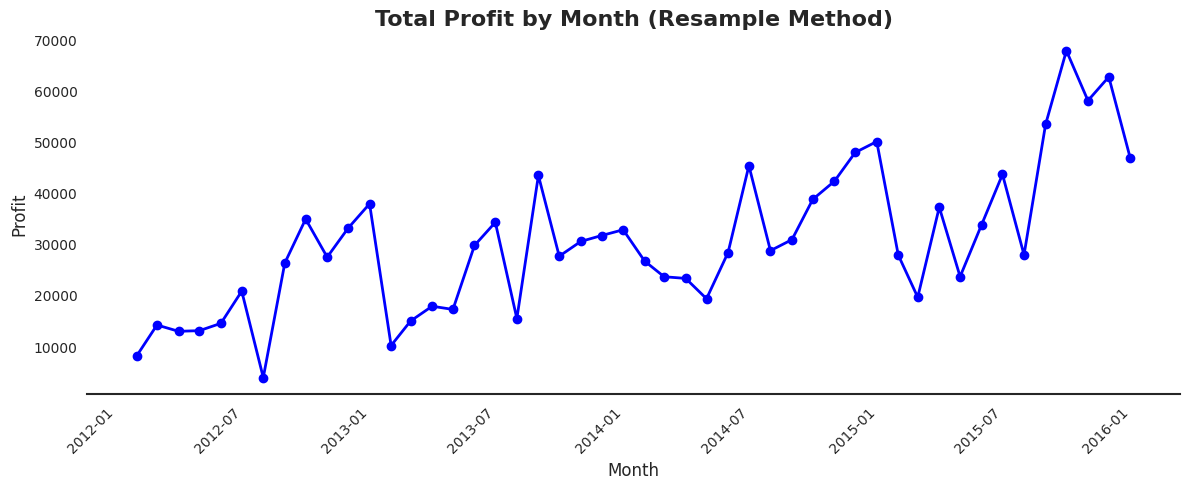

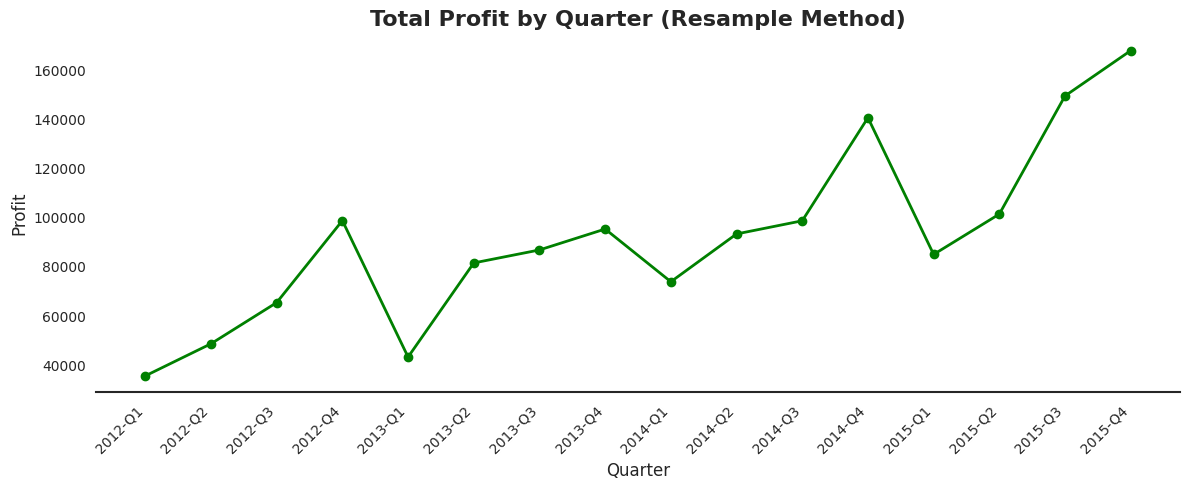

In [219]:
# Resample profit data by month and quarter
monthly_profit_resampled = df.resample('ME', on='Order Date')['Profit'].sum()
quarterly_profit_resampled = df.resample('QE', on='Order Date')['Profit'].sum()

# Convert quarterly index to "YYYY-QX" format for better readability
quarter_labels_profit = [f"{x.year}-Q{x.quarter}" for x in quarterly_profit_resampled.index]

# --- Line Plot: Profit by Month (Resample Method) ---
plt.figure(figsize=(12, 5))
plt.plot(monthly_profit_resampled.index, monthly_profit_resampled.values, marker='o', linestyle='-', linewidth=2, color='blue')
plt.title('Total Profit by Month (Resample Method)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)

# Clean up the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show();

# --- Line Plot: Profit by Quarter (Resample Method) ---
plt.figure(figsize=(12, 5))
plt.plot(quarter_labels_profit, quarterly_profit_resampled.values, marker='o', linestyle='-', linewidth=2, color='green')
plt.title('Total Profit by Quarter (Resample Method)', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)

# Clean up the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.tight_layout()
plt.show();


## Customizations and Innovations

### Cell 1: Combining Sales and Profit
*  Here we see sales and profit numbers together on a single graph.

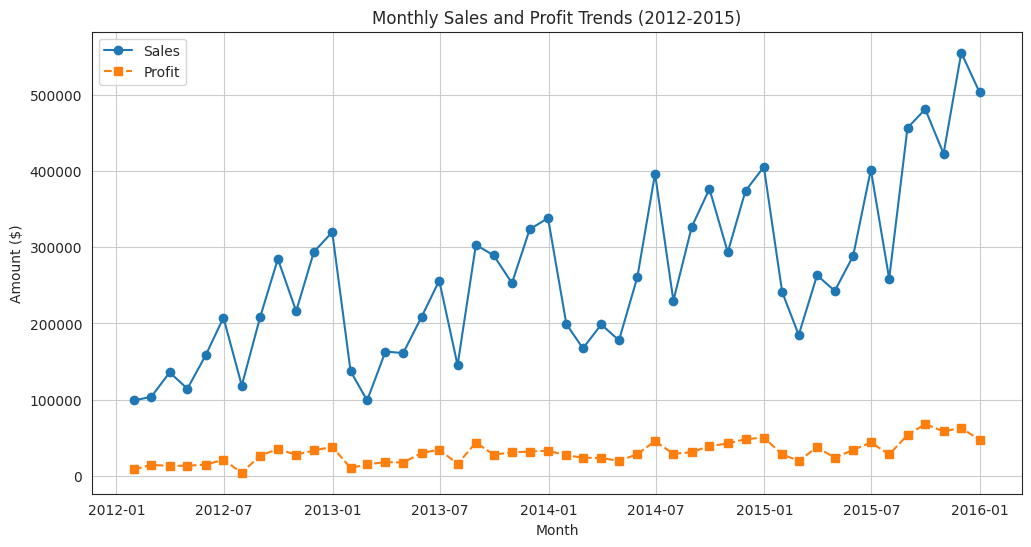

In [220]:
# Resample sales and profit data by month
df_monthly = df.resample('ME', on='Order Date')[['Sales', 'Profit']].sum()  # Resample both columns

# Reset index to make "Order Date" a regular column and name it "Month"
df_monthly = df_monthly.reset_index().rename(columns={'Order Date': 'Month'})

# Create a basic line plot for sales and profit over time
plt.figure(figsize=(12, 6))
plt.plot(df_monthly["Month"], df_monthly["Sales"], label="Sales", marker="o", linestyle="-")
plt.plot(df_monthly["Month"], df_monthly["Profit"], label="Profit", marker="s", linestyle="--")

# Formatting
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Monthly Sales and Profit Trends (2012-2015)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Cell 2: Incorporating Seaborn and Knaflic
*  Modifying the above with Seaborn's 'whitegrid' and data viz principles from Knaflic

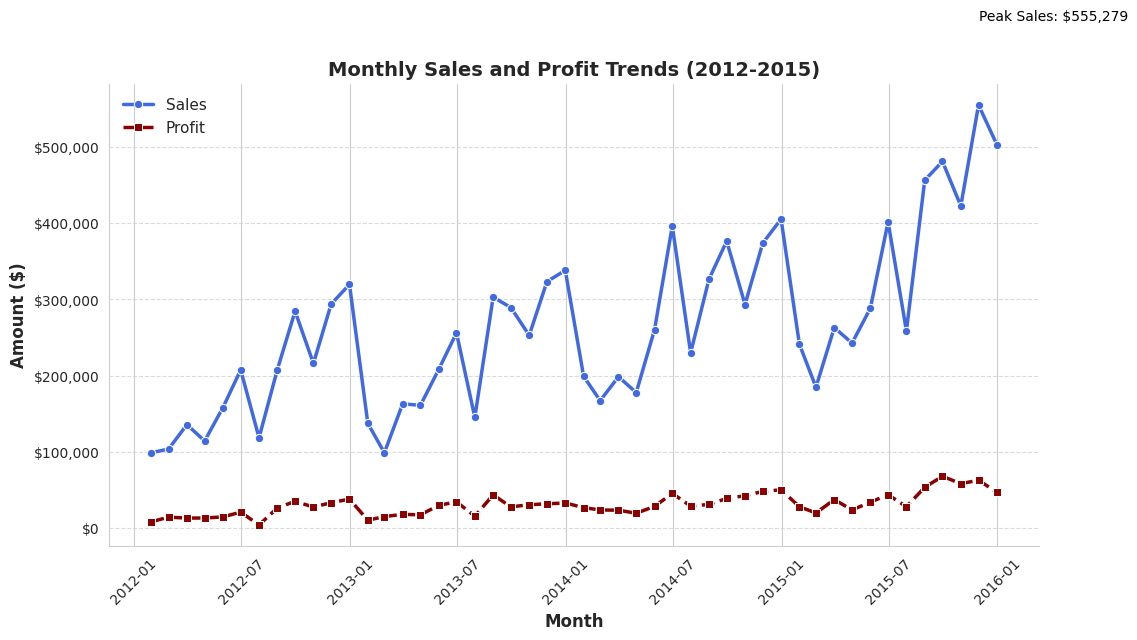

In [221]:
# Set Seaborn style for improved readability
sns.set_style("whitegrid")

# Create a Seaborn-enhanced line plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot with better aesthetics
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Sales"], label="Sales", marker="o", color="royalblue", linewidth=2.5)
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Profit"], label="Profit", marker="s", color="darkred", linewidth=2.5, linestyle="dashed")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Monthly Sales and Profit Trends (2012-2015)", fontsize=14, fontweight="bold")

# Format y-axis to show currency with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove top and right spines to reduce clutter
sns.despine()

# Add light grid lines for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight key insights (e.g., highest sales month)
max_sales = df_monthly.loc[df_monthly["Sales"].idxmax()]
plt.annotate(f"Peak Sales: ${max_sales['Sales']:,.0f}",
             xy=(max_sales["Month"], max_sales["Sales"]),
             xytext=(max_sales["Month"], max_sales["Sales"] * 1.2),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=10, color="black")

# Show the legend outside the plot for clarity
plt.legend(loc="upper left", frameon=False, fontsize=11)

# Display the plot
plt.show()


### Cells 3-5: Further refinements
*  I asked for further revisions: "Can we make the x-axis labels horizontal and convert them to display as abbreviated month and year, e.g., "Jan 2012"? Also remove the gridlines. And can we add data labels for local maximum and minimum values? Also increase the size of the key insight, and add a key insight for 'Peak Profit'."
*  This was less successful as an error resulted, and also the data labels made the graph too busy/crowded. Also, the rocket and money bag icons suggested by ChatGPT don't display in this font.
*  Gemini resolved the error by suggesting that I import the mdates module.
*  To clean up the other issues, I commented out the data labels (but very cool that local max/min can be ID'd and displayed) and deleted the icons.
*  I also added vertical gridlines to show alignment with months.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


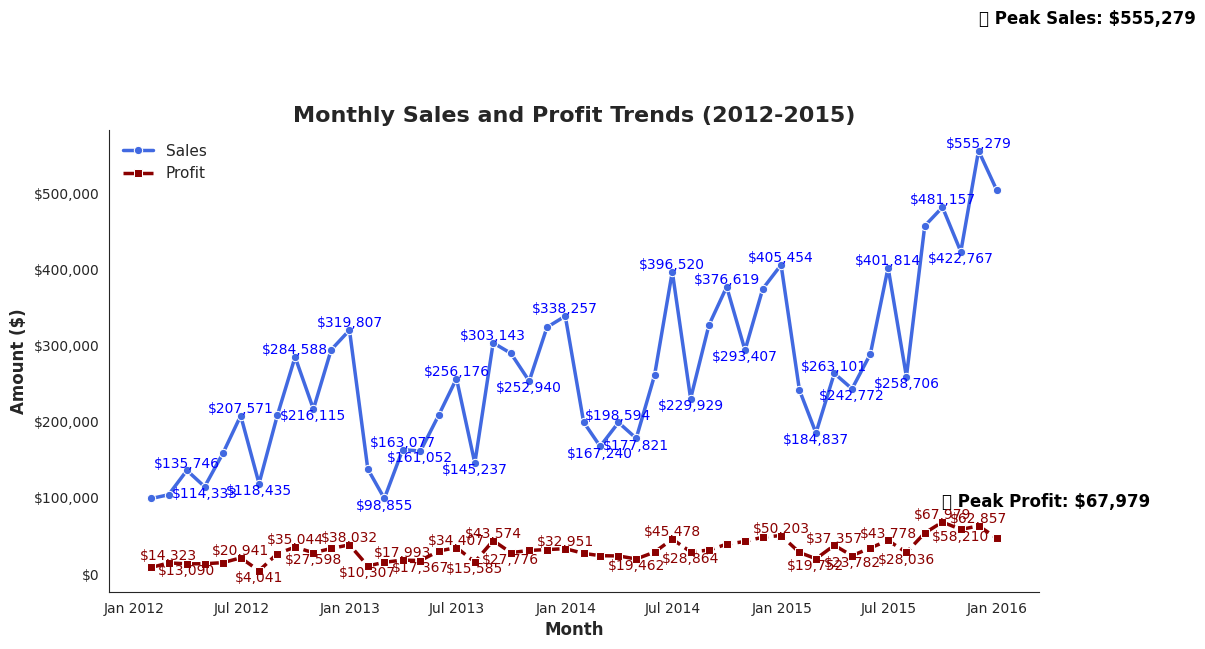

In [222]:
import matplotlib.dates as mdates # Import the mdates module

# Set Seaborn style for improved readability
sns.set_style("white")

# Create a Seaborn-enhanced line plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot with better aesthetics
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Sales"], label="Sales", marker="o", color="royalblue", linewidth=2.5)
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Profit"], label="Profit", marker="s", color="darkred", linewidth=2.5, linestyle="dashed")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Monthly Sales and Profit Trends (2012-2015)", fontsize=16, fontweight="bold")

# Format y-axis to show currency with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Set x-axis labels to abbreviated month and year format (e.g., "Jan 2012")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Remove gridlines for a cleaner look
plt.grid(False)

# Remove top and right spines
sns.despine()

# Identify key insights (Peak Sales & Peak Profit)
max_sales = df_monthly.loc[df_monthly["Sales"].idxmax()]
max_profit = df_monthly.loc[df_monthly["Profit"].idxmax()]

# Add key insight annotations
plt.annotate(f"🚀 Peak Sales: ${max_sales['Sales']:,.0f}",
             xy=(max_sales["Month"], max_sales["Sales"]),
             xytext=(max_sales["Month"], max_sales["Sales"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

plt.annotate(f"💰 Peak Profit: ${max_profit['Profit']:,.0f}",
             xy=(max_profit["Month"], max_profit["Profit"]),
             xytext=(max_profit["Month"], max_profit["Profit"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

# Identify local maxima and minima for both sales and profit
local_max_sales = df_monthly[(df_monthly["Sales"].shift(1) < df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) < df_monthly["Sales"])]
local_min_sales = df_monthly[(df_monthly["Sales"].shift(1) > df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) > df_monthly["Sales"])]

local_max_profit = df_monthly[(df_monthly["Profit"].shift(1) < df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) < df_monthly["Profit"])]
local_min_profit = df_monthly[(df_monthly["Profit"].shift(1) > df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) > df_monthly["Profit"])]

# Add labels for local maxima and minima
for idx, row in local_max_sales.iterrows():
    plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="bottom")

for idx, row in local_min_sales.iterrows():
    plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="top")

for idx, row in local_max_profit.iterrows():
    plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="bottom")

for idx, row in local_min_profit.iterrows():
    plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="top")

# Show the legend outside the plot for clarity
plt.legend(loc="upper left", frameon=False, fontsize=11)

# Display the plot
plt.show()


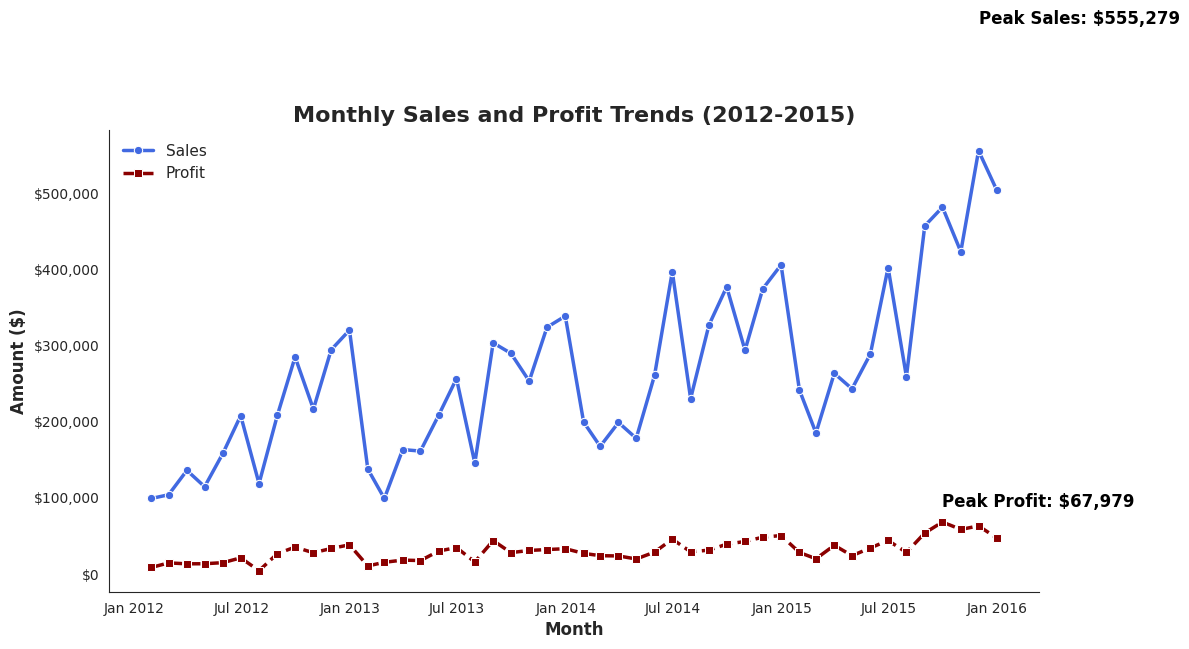

In [223]:
import matplotlib.dates as mdates # Import the mdates module

# Set Seaborn style for improved readability
sns.set_style("white")

# Create a Seaborn-enhanced line plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot with better aesthetics
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Sales"], label="Sales", marker="o", color="royalblue", linewidth=2.5)
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Profit"], label="Profit", marker="s", color="darkred", linewidth=2.5, linestyle="dashed")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Monthly Sales and Profit Trends (2012-2015)", fontsize=16, fontweight="bold")

# Format y-axis to show currency with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Set x-axis labels to abbreviated month and year format (e.g., "Jan 2012")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Remove gridlines for a cleaner look
plt.grid(False)

# Remove top and right spines
sns.despine()

# Identify key insights (Peak Sales & Peak Profit)
max_sales = df_monthly.loc[df_monthly["Sales"].idxmax()]
max_profit = df_monthly.loc[df_monthly["Profit"].idxmax()]

# Add key insight annotations
plt.annotate(f"Peak Sales: ${max_sales['Sales']:,.0f}",
             xy=(max_sales["Month"], max_sales["Sales"]),
             xytext=(max_sales["Month"], max_sales["Sales"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

plt.annotate(f"Peak Profit: ${max_profit['Profit']:,.0f}",
             xy=(max_profit["Month"], max_profit["Profit"]),
             xytext=(max_profit["Month"], max_profit["Profit"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

# Identify local maxima and minima for both sales and profit
local_max_sales = df_monthly[(df_monthly["Sales"].shift(1) < df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) < df_monthly["Sales"])]
local_min_sales = df_monthly[(df_monthly["Sales"].shift(1) > df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) > df_monthly["Sales"])]

local_max_profit = df_monthly[(df_monthly["Profit"].shift(1) < df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) < df_monthly["Profit"])]
local_min_profit = df_monthly[(df_monthly["Profit"].shift(1) > df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) > df_monthly["Profit"])]

# Add labels for local maxima and minima
# for idx, row in local_max_sales.iterrows():
#     plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="bottom")

# for idx, row in local_min_sales.iterrows():
#     plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="top")

# for idx, row in local_max_profit.iterrows():
#     plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="bottom")

# for idx, row in local_min_profit.iterrows():
#     plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="top")

# Show the legend outside the plot for clarity
plt.legend(loc="upper left", frameon=False, fontsize=11)

# Display the plot
plt.show()


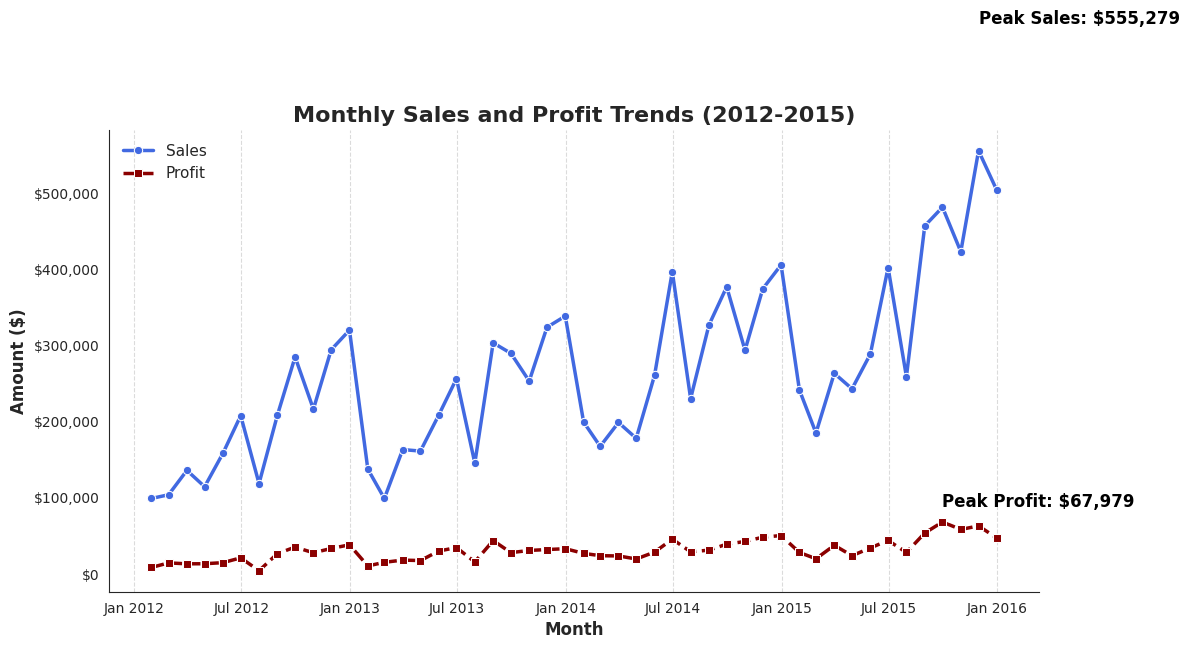

In [224]:
import matplotlib.dates as mdates # Import the mdates module

# Set Seaborn style for improved readability
sns.set_style("white")

# Create a Seaborn-enhanced line plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot with better aesthetics
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Sales"], label="Sales", marker="o", color="royalblue", linewidth=2.5)
sns.lineplot(x=df_monthly["Month"], y=df_monthly["Profit"], label="Profit", marker="s", color="darkred", linewidth=2.5, linestyle="dashed")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Monthly Sales and Profit Trends (2012-2015)", fontsize=16, fontweight="bold")

# Format y-axis to show currency with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Set x-axis labels to abbreviated month and year format (e.g., "Jan 2012")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Remove gridlines for a cleaner look
# plt.grid(False)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Enables only vertical grid lines

# Remove top and right spines
sns.despine()

# Identify key insights (Peak Sales & Peak Profit)
max_sales = df_monthly.loc[df_monthly["Sales"].idxmax()]
max_profit = df_monthly.loc[df_monthly["Profit"].idxmax()]

# Add key insight annotations
plt.annotate(f"Peak Sales: ${max_sales['Sales']:,.0f}",
             xy=(max_sales["Month"], max_sales["Sales"]),
             xytext=(max_sales["Month"], max_sales["Sales"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

plt.annotate(f"Peak Profit: ${max_profit['Profit']:,.0f}",
             xy=(max_profit["Month"], max_profit["Profit"]),
             xytext=(max_profit["Month"], max_profit["Profit"] * 1.3),
             arrowprops=dict(facecolor="black", arrowstyle="->"),
             fontsize=12, fontweight="bold", color="black")

# Identify local maxima and minima for both sales and profit
local_max_sales = df_monthly[(df_monthly["Sales"].shift(1) < df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) < df_monthly["Sales"])]
local_min_sales = df_monthly[(df_monthly["Sales"].shift(1) > df_monthly["Sales"]) &
                             (df_monthly["Sales"].shift(-1) > df_monthly["Sales"])]

local_max_profit = df_monthly[(df_monthly["Profit"].shift(1) < df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) < df_monthly["Profit"])]
local_min_profit = df_monthly[(df_monthly["Profit"].shift(1) > df_monthly["Profit"]) &
                              (df_monthly["Profit"].shift(-1) > df_monthly["Profit"])]

# Add labels for local maxima and minima
# for idx, row in local_max_sales.iterrows():
#     plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="bottom")

# for idx, row in local_min_sales.iterrows():
#     plt.text(row["Month"], row["Sales"], f"${row['Sales']:,.0f}", fontsize=10, color="blue", ha="center", va="top")

# for idx, row in local_max_profit.iterrows():
#     plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="bottom")

# for idx, row in local_min_profit.iterrows():
#     plt.text(row["Month"], row["Profit"], f"${row['Profit']:,.0f}", fontsize=10, color="darkred", ha="center", va="top")

# Show the legend outside the plot for clarity
plt.legend(loc="upper left", frameon=False, fontsize=11)

# Display the plot
plt.show()


### Cells 6-8: Sales and Profit Comparison Bar Chart
*  This creates an appealing bar chart, but again the initial version contained an error. The issue may involve bringing in coding suggestions from ChatGPT late in the process, where it doesn't "know" how the data frames have been defined. Again, Gemini provides the fix.
*  I do like that ChatGPT retains my stated preference for a clean, minimalist look.
*  In a final version, I will try to manually change the colors.

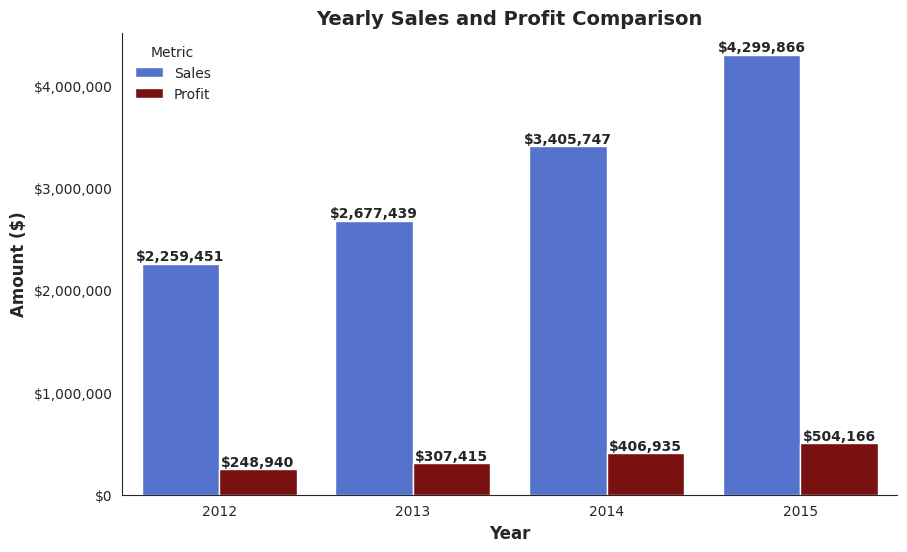

In [225]:
# Aggregate sales and profit by year
df_yearly = df.groupby(df['Order Date'].dt.year)[["Sales", "Profit"]].sum().reset_index()
df_yearly.rename(columns={'Order Date': 'Year'}, inplace=True)

# Create a bar chart comparing yearly sales and profit
plt.figure(figsize=(10, 6))

# Bar chart using Seaborn
sns.barplot(data=df_yearly.melt(id_vars="Year", var_name="Metric", value_name="Amount"),
            x="Year", y="Amount", hue="Metric", palette=["royalblue", "darkred"])

# Formatting
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Yearly Sales and Profit Comparison", fontsize=14, fontweight="bold")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add value labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid labeling negative values
        plt.text(p.get_x() + p.get_width() / 2., height, f"${height:,.0f}",
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

# Remove top and right spines for cleaner look
sns.despine()

# Show the legend outside the plot for clarity
plt.legend(title="Metric", loc="upper left", frameon=False)

# Display the plot
plt.show()


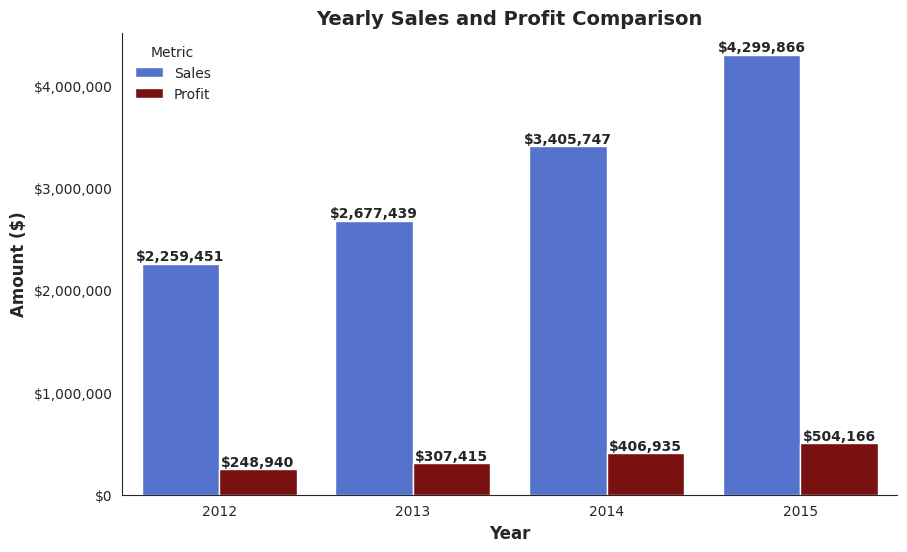

In [226]:
# Aggregate sales and profit by year
df_yearly = df.groupby(df['Order Date'].dt.year)[["Sales", "Profit"]].sum().reset_index()
df_yearly.rename(columns={'Order Date': 'Year'}, inplace=True)  # Rename the 'Order Date' column to 'Year'

# Create a bar chart comparing yearly sales and profit
plt.figure(figsize=(10, 6))

# Bar chart using Seaborn
sns.barplot(data=df_yearly.melt(id_vars="Year", var_name="Metric", value_name="Amount"),
            x="Year", y="Amount", hue="Metric", palette=["royalblue", "darkred"])

# Formatting
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Yearly Sales and Profit Comparison", fontsize=14, fontweight="bold")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add value labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid labeling negative values
        plt.text(p.get_x() + p.get_width() / 2., height, f"${height:,.0f}",
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

# Remove top and right spines for cleaner look
sns.despine()

# Show the legend outside the plot for clarity
plt.legend(title="Metric", loc="upper left", frameon=False)

# Display the plot
plt.show()

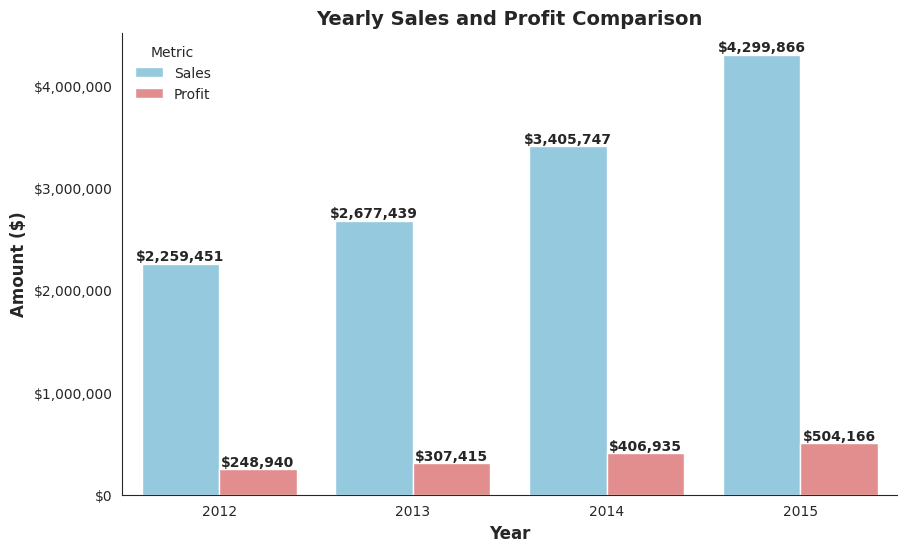

In [227]:
# Aggregate sales and profit by year
df_yearly = df.groupby(df['Order Date'].dt.year)[["Sales", "Profit"]].sum().reset_index()
df_yearly.rename(columns={'Order Date': 'Year'}, inplace=True)  # Rename the 'Order Date' column to 'Year'

# Create a bar chart comparing yearly sales and profit
plt.figure(figsize=(10, 6))

# Bar chart using Seaborn
sns.barplot(data=df_yearly.melt(id_vars="Year", var_name="Metric", value_name="Amount"),
            x="Year", y="Amount", hue="Metric", palette=["skyblue", "lightcoral"])

# Formatting
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Yearly Sales and Profit Comparison", fontsize=14, fontweight="bold")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add value labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Avoid labeling negative values
        plt.text(p.get_x() + p.get_width() / 2., height, f"${height:,.0f}",
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

# Remove top and right spines for cleaner look
sns.despine()

# Show the legend outside the plot for clarity
plt.legend(title="Metric", loc="upper left", frameon=False)

# Display the plot
plt.show()

### Cells 9-10: Violin Plots


<ipython-input-228-37b72f893c42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Profit", palette="coolwarm", inner="quartile")


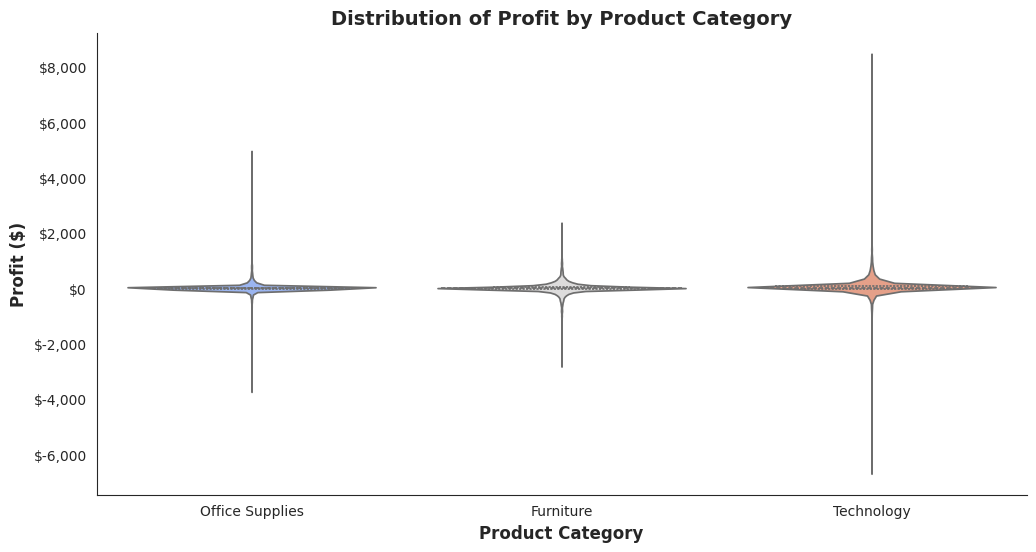

In [228]:
# Create a violin plot for profit distribution by product category
plt.figure(figsize=(12, 6))

# Use Seaborn's violin plot for profit distribution by category
sns.violinplot(data=df, x="Category", y="Profit", palette="coolwarm", inner="quartile")

# Formatting
plt.xlabel("Product Category", fontsize=12, fontweight="bold")
plt.ylabel("Profit ($)", fontsize=12, fontweight="bold")
plt.title("Distribution of Profit by Product Category", fontsize=14, fontweight="bold")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Remove unnecessary spines
sns.despine()

# Display the plot
plt.show()


<ipython-input-229-4eddbe35545f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Category", y="Profit", palette="coolwarm", inner="quartile")


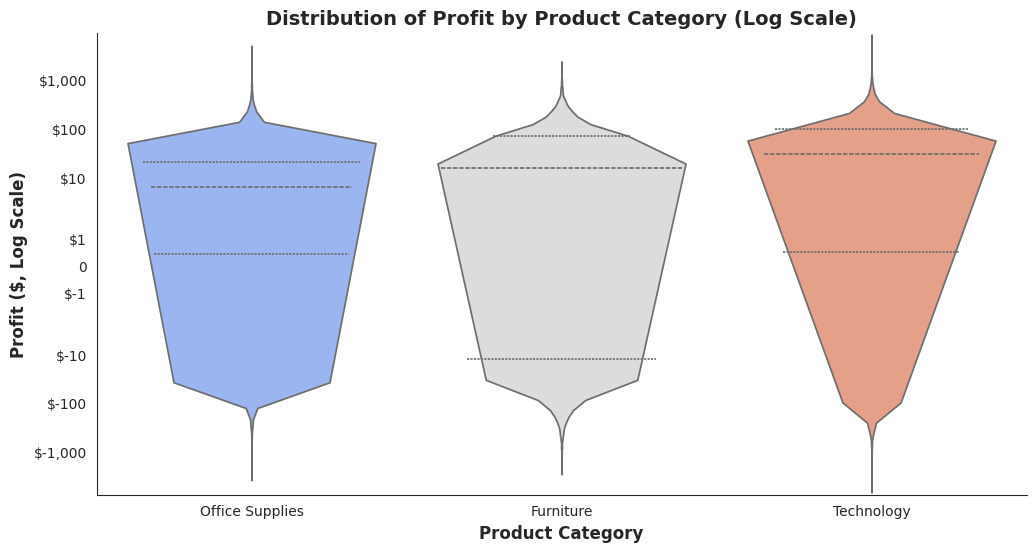

In [229]:
# Make a more readable version of the above using a log scale for the y-axis

# Create a violin plot for profit distribution by product category using the correct DataFrame
plt.figure(figsize=(12, 6))

# Use Seaborn's violin plot for profit distribution by category
sns.violinplot(data=df, x="Category", y="Profit", palette="coolwarm", inner="quartile")

# Formatting
plt.xlabel("Product Category", fontsize=12, fontweight="bold")
plt.ylabel("Profit ($, Log Scale)", fontsize=12, fontweight="bold")
plt.title("Distribution of Profit by Product Category (Log Scale)", fontsize=14, fontweight="bold")

# Apply log scale to the y-axis
plt.yscale("symlog")  # "symlog" allows for symmetric log scaling, keeping small values readable

# Format y-axis as currency where possible
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}" if x != 0 else "0"))

# Remove unnecessary spines
sns.despine()

# Display the plot
plt.show()
